<a href="https://colab.research.google.com/github/eduardocarbo/NewRepo/blob/master/%5B01%5D_Credite_Score_ECB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credit Scoring Case

 Description:
The data respond to information on credit applications to a bank.
A sample of 4455 clients is provided for which sociodemographic and economic information, the characteristics of the credit requested and the result of the evaluation are available.
There are two categories of opinion: positive, indicating that the credit can be granted, and negative, indicating that it will be denied.
It is important to understand the differences between those that have a positive opinion and those that do not. There are several alternatives, but for any of them, the first step is to make a good description and cleaning of the data.

Dictionary: Necessary to understand and to convert some variables from "numerical" to factors.

The value 99999999 in continuous variables indicates missing value. A 0
indicates a missing value in categorical variables.

Codings: (to be taken into account to perform the analysis and to obtain the

MINABLE view of the data)

final opinion (response variable)

1 positive

2 negative

Seniority in the job (years) (how many years in the current work?)

housing (kind of house)

1 renting (renting)

2 escritura publica (registered)

3 contrato privado (private contract)

4 ignora contrato (ignore contract)

5 padres (parents)

6 otros (other)

Loan term (months) (timing for credit)

Age

marital status (civil status)

1 bachelor

2 married

3 widowed

4 separated

5 divorced

registers (registers)

1

In [6]:
########################################################################################################################
#                                                  <<INSTALL LIBRARIES>>.
#######################################################################################################################
install.packages("dplyr")
install.packages("tidyr")
install.packages("ggplot2")
install.packages("DMwR2")
install.packages("dplyr")
install.packages("missForest")
library(dplyr)                                                                  #Manejo datos
library(tidyr)
library(ggplot2)                                                                #Para graficar
library(DMwR2)                                                                  #Para que funcione el KNN Algorit
library(missForest)                                                             #Para que funcione RANDOM FOREST

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
########################################################################################################################
#                                                    <<WE IMPORT THE DATA:>>
########################################################################################################################
Data <- read.csv(file= "credscoV2.csv", header=TRUE, sep=";", as.is = TRUE)
str(Data)                                                                       #Estructura de los datos
View(Data)                                                                      #Ver c�digo


'data.frame':	4455 obs. of  14 variables:
 $ Dictamen                  : int  1 1 2 1 1 1 1 1 1 2 ...
 $ Antiguedad.Trabajo        : int  9 17 10 0 0 1 29 9 0 0 ...
 $ Vivienda                  : int  1 1 2 1 1 2 2 5 2 5 ...
 $ Plazo                     : int  60 60 36 60 36 60 60 12 60 48 ...
 $ Edad                      : int  30 58 46 24 26 36 44 27 32 41 ...
 $ Estado.civil              : int  2 3 2 1 1 2 2 1 2 2 ...
 $ Registros                 : int  1 1 2 1 1 1 1 1 1 1 ...
 $ Tipo.trabajo              : int  3 1 3 1 1 1 1 1 3 2 ...
 $ Gastos                    : int  73 48 90 63 46 75 75 35 90 90 ...
 $ Ingresos                  : int  129 131 200 182 107 214 125 80 107 80 ...
 $ Patrimonio                : int  0 0 3000 2500 0 3500 10000 0 15000 0 ...
 $ Cargas.patrimoniales      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Importe.solicitado        : int  800 1000 2000 900 310 650 1600 200 1200 1200 ...
 $ Precio.del.bien.financiado: int  846 1658 2985 1325 910 1645 1800 1093 1957 1468 .

Dictamen Antiguedad.Trabajo Vivienda Plazo Edad Estado.civil Registros
1    1         9                 1        60    30   2            1        
2    1        17                 1        60    58   3            1        
3    2        10                 2        36    46   2            2        
4    1         0                 1        60    24   1            1        
5    1         0                 1        36    26   1            1        
6    1         1                 2        60    36   2            1        
7    1        29                 2        60    44   2            1        
8    1         9                 5        12    27   1            1        
9    1         0                 2        60    32   2            1        
10   2         0                 5        48    41   2            1        
11   1         6                 2        48    34   2            1        
12   1         7                 2        36    29   2            1        
13   1         8                 2        60    30   2            1        
14   1        19                 3        36    37   2            1        
15   2         0                 6        18    21   1            2        
16   1         0                 2        24    68   2            1        
17   1        15                 3        24    52   1            1        
18   1        33                 1        24    68   2            1        
19   2         0                 4        48    36   2            1        
20   1         1                 5        60    31   1            1        
21   2         2                 1        60    25   1            1        
22   1         5                 2        60    22   1            1        
23   2         1                 2        60    45   2            1        
24   1        27                 1        60    41   2            1        
25   1        26                 2        60    51   2            1        
26   1        12                 2        36    54   2            1        
27   1        19                 2        60    43   1            1        
28   1        15                 2        36    43   2            1        
29   2         3                 2        24    23   2            1        
30   2         0                 6        48    37   1            1        
⋮    ⋮        ⋮                  ⋮        ⋮     ⋮    ⋮            ⋮        
4426 1         6                 2        60    43   2            2        
4427 1         1                 2        36    26   2            1        
4428 1        34                 2        60    50   2            2        
4429 1        20                 2        48    47   2            1        
4430 1         6                 2        60    26   2            1        
4431 2         4                 3        36    38   2            1        
4432 1         3                 2        24    64   2            1        
4433 2         0                 1        60    36   2            2        
4434 1         8                 2        48    40   1            1        
4435 2         8                 2        36    51   3            1        
4436 1         6                 5        60    31   2            1        
4437 2         3                 1        48    26   2            2        
4438 2         1                 5        48    18   1            1        
4439 1         4                 4        18    37   2            1        
4440 2         8                 2        60    37   2            1        
4441 1        20                 2        60    38   2            1        
4442 1         3                 2        42    41   2            1        
4443 1        10                 2        60    33   1            1        
4444 2         2                 2        60    31   4            1        
4445 1         1                 2        60    31   3            2        
4446 2         6                 5        60    22   

In [8]:

########################################################################################################################
#                                             Para mirar si tengo datos ausentes (missing data):
########################################################################################################################
table(is.na(Data))                                                              #Se tienen 99 Missing Data

mis_ind = rowSums(is.na(Data))                                                  #Donde se encuetran los missing Data
m1 <- which(mis_ind>0)
Data[m1,]
table(mis_ind)

mis_col = colSums(is.na(Data))                                                  #Donde se encuentra los missing data por Par�metros
mis_col


Data$Dictamen=as.factor(Data$Dictamen)                                          #Convertimos en factores a: "Dictamen" , "Vivienda","Estado Civil", "Registros", "Tipo de Trabajo"
Data$Vivienda=as.factor(Data$Vivienda)
Data$Estado.civil=as.factor(Data$Estado.civil)
Data$Registros=as.factor(Data$Registros)
Data$Tipo.trabajo=as.factor(Data$Tipo.trabajo)


summary(Data)                                                                   #Revisamos con un summary como qued� la estructura de los datos
bk <- Data                                                                      #Backup



FALSE  TRUE 
62271    99 

Dictamen Antiguedad.Trabajo Vivienda Plazo Edad Estado.civil Registros
30   2         0                 6        48    37   1            1        
240  1         3                 6        24    42   1            1        
394  2         1                 2        36    52   2            2        
735  2        30                 2        18    57   2            2        
804  1         6                 5        24    25   1            1        
1060 1         6                 6        12    25   1            1        
1129 1        14                 2        60    56   2            2        
1307 1        12                 2        36    41   2            1        
1421 2         0                 2        60    36   2            2        
1437 1         5                 1        24    29   2            1        
1456 2         2                 2        36    19   1            2        
1473 1        15                 2        60    40   2            2        
1535 2         1                 2        60    39   2            1        
1544 2        10                 2        36    43   2            1        
1583 2        10                 5        12    25   1            1        
1598 1         3                 2        36    36   2            1        
1670 1         2                 5        48    20   1            1        
1677 2         4                 6        48    47   2            2        
1771 1         3                 1        48    51   2            1        
1802 1         0                 5        24    21   1            1        
1807 2         0                 1        60    35   2            1        
1812 1        14                 2        24    50   2            1        
1845 2         1                 1        24    31   4            1        
1851 1        22                 2        36    50   2            1        
1878 2        12                 3        24    28   2            1        
1893 2        27                 2        18    47   2            2        
2025 1         0                 2        48    47   1            1        
2042 2         2                 1        60    54   2            1        
2074 1         1                 3        36    27   2            1        
2083 2         3                 3        30    22   1            1        
⋮    ⋮        ⋮                  ⋮        ⋮     ⋮    ⋮            ⋮        
2983 2         5                 2        36    35   4            1        
2996 2        10                 6        18    47   2            2        
3053 1        12                 3        60    45   2            1        
3183 1         3                 2        48    25   2            2        
3196 1        25                 2        36    53   2            1        
3218 2        14                 2        36    31   2            1        
3229 2        20                 2        24    59   1            1        
3331 1         2                 5        60    31   2            1        
3383 1         0                 1        60    44   2            1        
3441 1        12                 2        36    47   2            1        
3514 2         2                 1        60    32   2            2        
3535 2         1                 2        36    41   1            2        
3550 1        23                 1        60    43   2            1        
3648 1        22                 2        48    40   2            1        
3653 2         0                 6        60    32   1            1        
3662 2         5                 2        60    39   1            2        
3822 1        10                 2        24    50   2            1        
3851 1         3                 5        48    20   1            1        
4036 1         2                 1        60    38   1            1        
4075 2         8                 2        60    64   2            1        
4077 2         0                 5        60    26   

mis_ind
   0    1    2    3 
4378   58   16    3 

Dictamen         Antiguedad.Trabajo 
                         0                          0 
                  Vivienda                      Plazo 
                         0                          0 
                      Edad               Estado.civil 
                         0                          0 
                 Registros               Tipo.trabajo 
                         0                          0 
                    Gastos                   Ingresos 
                         0                         34 
                Patrimonio       Cargas.patrimoniales 
                        47                         18 
        Importe.solicitado Precio.del.bien.financiado 
                         0                          0

 Dictamen Antiguedad.Trabajo Vivienda     Plazo            Edad      
 1:3200   Min.   : 0.000     1: 973   Min.   : 6.00   Min.   :18.00  
 2:1255   1st Qu.: 2.000     2:2107   1st Qu.:36.00   1st Qu.:28.00  
          Median : 5.000     3: 247   Median :48.00   Median :36.00  
          Mean   : 7.987     4:  20   Mean   :46.44   Mean   :37.08  
          3rd Qu.:12.000     5: 783   3rd Qu.:60.00   3rd Qu.:45.00  
          Max.   :48.000     6: 325   Max.   :72.00   Max.   :68.00  
                                                                     
 Estado.civil Registros Tipo.trabajo     Gastos          Ingresos    
 1: 979       1:3682    1:2806       Min.   : 35.00   Min.   :  0.0  
 2:3241       2: 773    2: 452       1st Qu.: 35.00   1st Qu.: 80.0  
 3:  67                 3:1026       Median : 51.00   Median :120.0  
 4: 130                 4: 171       Mean   : 55.57   Mean   :130.6  
 5:  38                              3rd Qu.: 72.00   3rd Qu.:165.0  
                    

In [9]:
#########################################################################################################################
#vamos a utlizar los vecinos cercanos con <<KNN algorit>> para los missing data:    #tratamiento de los missing data
#########################################################################################################################

DataKNN = knnImputation(Data[,1:14],k=1)    #df_imp_knn

summary(DataKNN)                                                                #revisamos de nuevo los datos
#En este momento ya no aparecen m�s NA

str(DataKNN)                                                                     #revisamos con est�n todos los par�metros
View(DataKNN)


 Dictamen Antiguedad.Trabajo Vivienda     Plazo            Edad      
 1:3200   Min.   : 0.000     1: 973   Min.   : 6.00   Min.   :18.00  
 2:1255   1st Qu.: 2.000     2:2107   1st Qu.:36.00   1st Qu.:28.00  
          Median : 5.000     3: 247   Median :48.00   Median :36.00  
          Mean   : 7.987     4:  20   Mean   :46.44   Mean   :37.08  
          3rd Qu.:12.000     5: 783   3rd Qu.:60.00   3rd Qu.:45.00  
          Max.   :48.000     6: 325   Max.   :72.00   Max.   :68.00  
 Estado.civil Registros Tipo.trabajo     Gastos          Ingresos    
 1: 979       1:3682    1:2806       Min.   : 35.00   Min.   :  0.0  
 2:3241       2: 773    2: 452       1st Qu.: 35.00   1st Qu.: 80.0  
 3:  67                 3:1026       Median : 51.00   Median :120.0  
 4: 130                 4: 171       Mean   : 55.57   Mean   :130.4  
 5:  38                              3rd Qu.: 72.00   3rd Qu.:165.0  
                                     Max.   :180.00   Max.   :959.0  
   Patrimonio     Ca

'data.frame':	4455 obs. of  14 variables:
 $ Dictamen                  : Factor w/ 2 levels "1","2": 1 1 2 1 1 1 1 1 1 2 ...
 $ Antiguedad.Trabajo        : int  9 17 10 0 0 1 29 9 0 0 ...
 $ Vivienda                  : Factor w/ 6 levels "1","2","3","4",..: 1 1 2 1 1 2 2 5 2 5 ...
 $ Plazo                     : int  60 60 36 60 36 60 60 12 60 48 ...
 $ Edad                      : int  30 58 46 24 26 36 44 27 32 41 ...
 $ Estado.civil              : Factor w/ 5 levels "1","2","3","4",..: 2 3 2 1 1 2 2 1 2 2 ...
 $ Registros                 : Factor w/ 2 levels "1","2": 1 1 2 1 1 1 1 1 1 1 ...
 $ Tipo.trabajo              : Factor w/ 4 levels "1","2","3","4": 3 1 3 1 1 1 1 1 3 2 ...
 $ Gastos                    : int  73 48 90 63 46 75 75 35 90 90 ...
 $ Ingresos                  : num  129 131 200 182 107 214 125 80 107 80 ...
 $ Patrimonio                : num  0 0 3000 2500 0 3500 10000 0 15000 0 ...
 $ Cargas.patrimoniales      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Importe.solicitado    

Dictamen Antiguedad.Trabajo Vivienda Plazo Edad Estado.civil Registros
1    1         9                 1        60    30   2            1        
2    1        17                 1        60    58   3            1        
3    2        10                 2        36    46   2            2        
4    1         0                 1        60    24   1            1        
5    1         0                 1        36    26   1            1        
6    1         1                 2        60    36   2            1        
7    1        29                 2        60    44   2            1        
8    1         9                 5        12    27   1            1        
9    1         0                 2        60    32   2            1        
10   2         0                 5        48    41   2            1        
11   1         6                 2        48    34   2            1        
12   1         7                 2        36    29   2            1        
13   1         8                 2        60    30   2            1        
14   1        19                 3        36    37   2            1        
15   2         0                 6        18    21   1            2        
16   1         0                 2        24    68   2            1        
17   1        15                 3        24    52   1            1        
18   1        33                 1        24    68   2            1        
19   2         0                 4        48    36   2            1        
20   1         1                 5        60    31   1            1        
21   2         2                 1        60    25   1            1        
22   1         5                 2        60    22   1            1        
23   2         1                 2        60    45   2            1        
24   1        27                 1        60    41   2            1        
25   1        26                 2        60    51   2            1        
26   1        12                 2        36    54   2            1        
27   1        19                 2        60    43   1            1        
28   1        15                 2        36    43   2            1        
29   2         3                 2        24    23   2            1        
30   2         0                 6        48    37   1            1        
⋮    ⋮        ⋮                  ⋮        ⋮     ⋮    ⋮            ⋮        
4426 1         6                 2        60    43   2            2        
4427 1         1                 2        36    26   2            1        
4428 1        34                 2        60    50   2            2        
4429 1        20                 2        48    47   2            1        
4430 1         6                 2        60    26   2            1        
4431 2         4                 3        36    38   2            1        
4432 1         3                 2        24    64   2            1        
4433 2         0                 1        60    36   2            2        
4434 1         8                 2        48    40   1            1        
4435 2         8                 2        36    51   3            1        
4436 1         6                 5        60    31   2            1        
4437 2         3                 1        48    26   2            2        
4438 2         1                 5        48    18   1            1        
4439 1         4                 4        18    37   2            1        
4440 2         8                 2        60    37   2            1        
4441 1        20                 2        60    38   2            1        
4442 1         3                 2        42    41   2            1        
4443 1        10                 2        60    33   1            1        
4444 2         2                 2        60    31   4            1        
4445 1         1                 2        60    31   3            2        
4446 2         6                 5        60    22   

In [11]:
#########################################################################################################################
#vamos a utlizar REGRESION CON <<RANDOM FOREST>> algorit para los missing data:    #tratamiento de los missing data
#########################################################################################################################


set.seed(17)                                                                    #imputaci�n con curvas de ajuste

#se hace la imputaci�n de los datos
DataRForest <- missForest(Data[,-c(2)], variablewise = T, verbose = T)


  missForest iteration 1 in progress...done!
    estimated error(s): 0 0 0 0 0 0 0 0 6311.966 113939050 1408150 0 0 
    difference(s): 0.004746192 0 
    time: 23.199 seconds

  missForest iteration 2 in progress...done!
    estimated error(s): 0 0 0 0 0 0 0 0 6270.729 112803556 1427660 0 0 
    difference(s): 0.000248762 0 
    time: 24.937 seconds

  missForest iteration 3 in progress...done!
    estimated error(s): 0 0 0 0 0 0 0 0 6208.127 114295117 1404947 0 0 
    difference(s): 0.0001223505 0 
    time: 24.222 seconds

  missForest iteration 4 in progress...done!
    estimated error(s): 0 0 0 0 0 0 0 0 6275.042 112019635 1418856 0 0 
    difference(s): 0.0001822473 0 
    time: 23.77 seconds



In [12]:

summary(DataRForest)                                                                   #revisamos de nuevo los datos
#En este momento ya no aparecen m�s NA
                                                                #revisamos con est�n todos los par�metros


         Length Class      Mode   
ximp     13     data.frame list   
OOBerror 13     -none-     numeric

In [15]:

DataRForest <- DataRForest$ximp
#view(DataRForest)


In [16]:
#str(DataRForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘DEoptimR’, ‘lmtest’, ‘proxy’, ‘RcppEigen’, ‘car’, ‘robustbase’, ‘sp’, ‘vcd’, ‘e1071’, ‘Rcpp’, ‘laeken’, ‘ranger’


Loading required package: colorspace

Loading required package: grid

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues



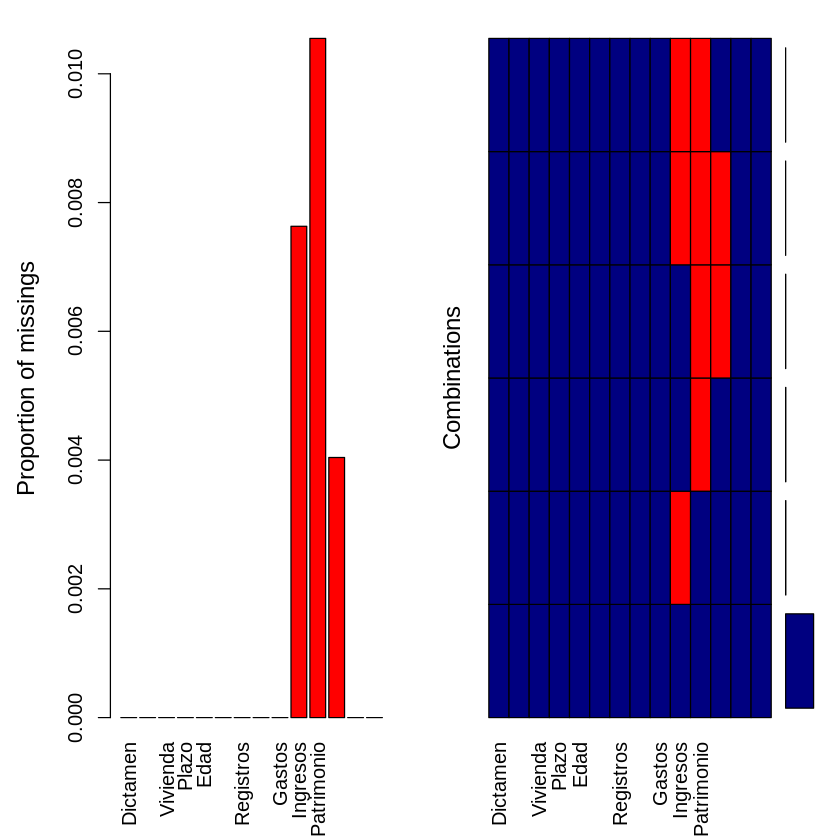

[1] TRUE

[1] FALSE

Dictamen Antiguedad.Trabajo Vivienda Plazo Edad Estado.civil Registros
30   2         0                 6        48    37   1            1        
240  1         3                 6        24    42   1            1        
394  2         1                 2        36    52   2            2        
735  2        30                 2        18    57   2            2        
804  1         6                 5        24    25   1            1        
1060 1         6                 6        12    25   1            1        
1129 1        14                 2        60    56   2            2        
1307 1        12                 2        36    41   2            1        
1421 2         0                 2        60    36   2            2        
1437 1         5                 1        24    29   2            1        
1456 2         2                 2        36    19   1            2        
1473 1        15                 2        60    40   2            2        
1535 2         1                 2        60    39   2            1        
1544 2        10                 2        36    43   2            1        
1583 2        10                 5        12    25   1            1        
1598 1         3                 2        36    36   2            1        
1670 1         2                 5        48    20   1            1        
1677 2         4                 6        48    47   2            2        
1771 1         3                 1        48    51   2            1        
1802 1         0                 5        24    21   1            1        
1807 2         0                 1        60    35   2            1        
1812 1        14                 2        24    50   2            1        
1845 2         1                 1        24    31   4            1        
1851 1        22                 2        36    50   2            1        
1878 2        12                 3        24    28   2            1        
1893 2        27                 2        18    47   2            2        
2025 1         0                 2        48    47   1            1        
2042 2         2                 1        60    54   2            1        
2074 1         1                 3        36    27   2            1        
2083 2         3                 3        30    22   1            1        
⋮    ⋮        ⋮                  ⋮        ⋮     ⋮    ⋮            ⋮        
2983 2         5                 2        36    35   4            1        
2996 2        10                 6        18    47   2            2        
3053 1        12                 3        60    45   2            1        
3183 1         3                 2        48    25   2            2        
3196 1        25                 2        36    53   2            1        
3218 2        14                 2        36    31   2            1        
3229 2        20                 2        24    59   1            1        
3331 1         2                 5        60    31   2            1        
3383 1         0                 1        60    44   2            1        
3441 1        12                 2        36    47   2            1        
3514 2         2                 1        60    32   2            2        
3535 2         1                 2        36    41   1            2        
3550 1        23                 1        60    43   2            1        
3648 1        22                 2        48    40   2            1        
3653 2         0                 6        60    32   1            1        
3662 2         5                 2        60    39   1            2        
3822 1        10                 2        24    50   2            1        
3851 1         3                 5        48    20   1            1        
4036 1         2                 1        60    38   1            1        
4075 2         8                 2        60    64   2            1        
4077 2         0                 5        60    26   

Dictamen Antiguedad.Trabajo Vivienda Plazo Edad Estado.civil Registros
30   2         0                 6        48    37   1            1        
240  1         3                 6        24    42   1            1        
394  2         1                 2        36    52   2            2        
735  2        30                 2        18    57   2            2        
804  1         6                 5        24    25   1            1        
1060 1         6                 6        12    25   1            1        
1129 1        14                 2        60    56   2            2        
1307 1        12                 2        36    41   2            1        
1421 2         0                 2        60    36   2            2        
1437 1         5                 1        24    29   2            1        
1456 2         2                 2        36    19   1            2        
1473 1        15                 2        60    40   2            2        
1535 2         1                 2        60    39   2            1        
1544 2        10                 2        36    43   2            1        
1583 2        10                 5        12    25   1            1        
1598 1         3                 2        36    36   2            1        
1670 1         2                 5        48    20   1            1        
1677 2         4                 6        48    47   2            2        
1771 1         3                 1        48    51   2            1        
1802 1         0                 5        24    21   1            1        
1807 2         0                 1        60    35   2            1        
1812 1        14                 2        24    50   2            1        
1845 2         1                 1        24    31   4            1        
1851 1        22                 2        36    50   2            1        
1878 2        12                 3        24    28   2            1        
1893 2        27                 2        18    47   2            2        
2025 1         0                 2        48    47   1            1        
2042 2         2                 1        60    54   2            1        
2074 1         1                 3        36    27   2            1        
2083 2         3                 3        30    22   1            1        
⋮    ⋮        ⋮                  ⋮        ⋮     ⋮    ⋮            ⋮        
2983 2         5                 2        36    35   4            1        
2996 2        10                 6        18    47   2            2        
3053 1        12                 3        60    45   2            1        
3183 1         3                 2        48    25   2            2        
3196 1        25                 2        36    53   2            1        
3218 2        14                 2        36    31   2            1        
3229 2        20                 2        24    59   1            1        
3331 1         2                 5        60    31   2            1        
3383 1         0                 1        60    44   2            1        
3441 1        12                 2        36    47   2            1        
3514 2         2                 1        60    32   2            2        
3535 2         1                 2        36    41   1            2        
3550 1        23                 1        60    43   2            1        
3648 1        22                 2        48    40   2            1        
3653 2         0                 6        60    32   1            1        
3662 2         5                 2        60    39   1            2        
3822 1        10                 2        24    50   2            1        
3851 1         3                 5        48    20   1            1        
4036 1         2                 1        60    38   1            1        
4075 2         8                 2        60    64   2            1        
4077 2         0                 5        60    26   

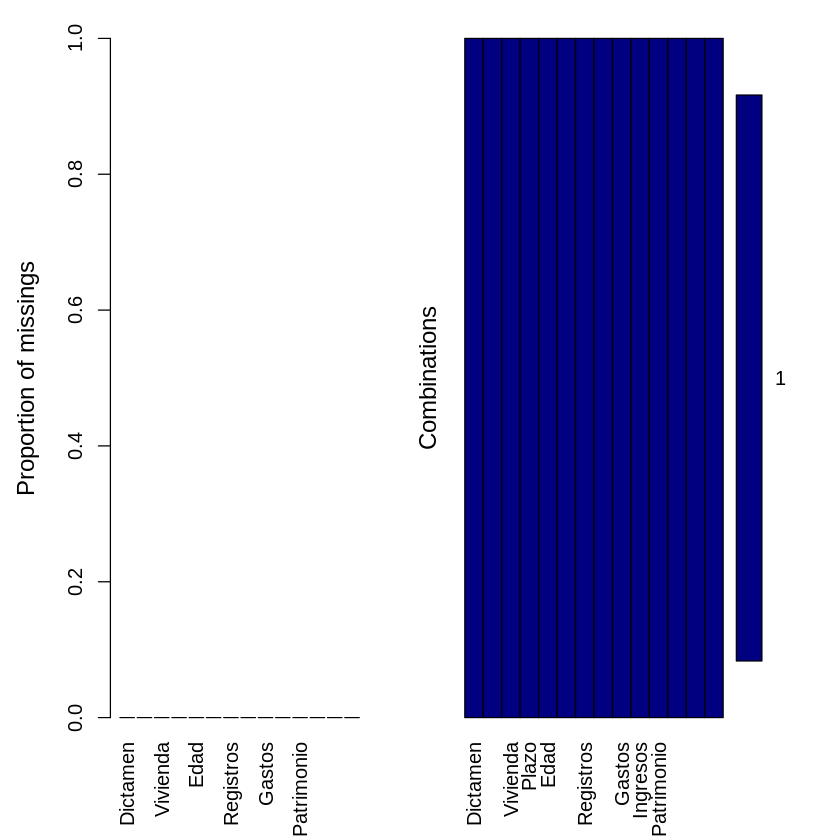

In [18]:
########################################################################################################################
#                                                 PERFILAMIENTO GR�FICO DE LOS DATOS (KNN):
########################################################################################################################
install.packages("VIM")

#ANTES:                                                                         #perfilamiento autom�tico de los datos gr�ficamente
library(VIM)
aggr_plot <- aggr(Data, col=c('navyblue','red'), numbers=TRUE, sortvars=TRUE, labels=names(Data))
#AHORA:
library(VIM)
aggr_plot <- aggr(DataKNN, col=c('navyblue','red'), numbers=TRUE, sortvars=TRUE, labels=names(DataKNN))


#ANTES:
any(!complete.cases(Data))                                                      #confirmamos que se presenta  NO missing data
#AHORA:
any(!complete.cases(DataKNN))                                                   #confirmamos que se presenta  NO missing data

#�LTIMA REVISI�N DE LOS DATOS KNN
Data[mis_ind>0,]
DataKNN[mis_ind>0,]

Warning message in plot.aggr(res, ...):
“not enough horizontal space to display frequencies”


ERROR: ignored

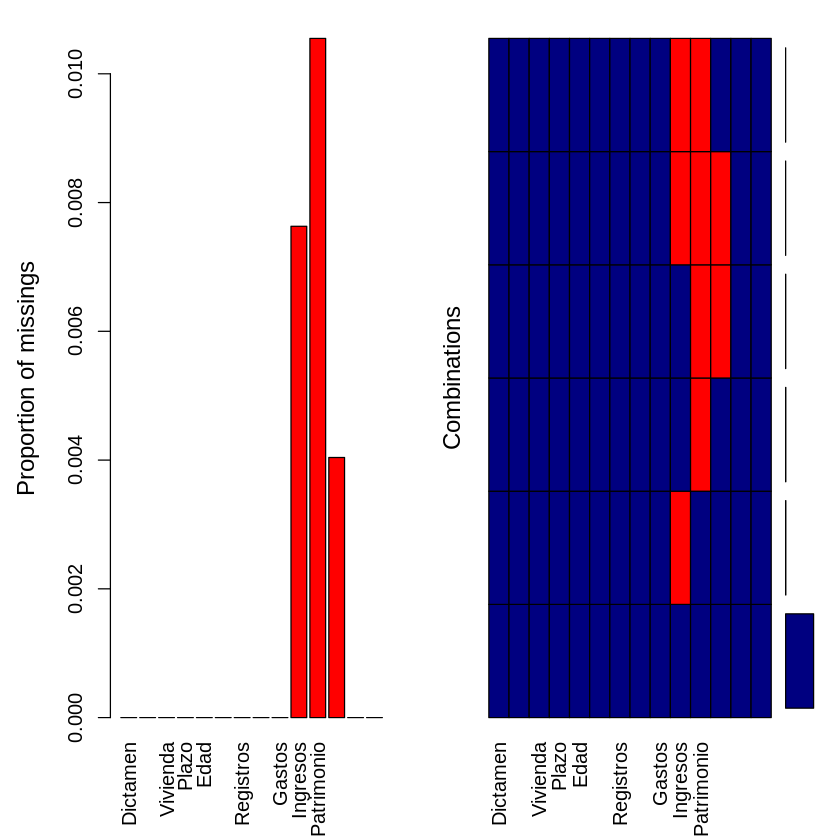

In [19]:
###################################################################################################################
#                                            PERFILAMIENTO GR�FICO DE LOS DATOS (Random_Forest):
###################################################################################################################

#ANTES:
#perfilamiento autom�tico de los datos gr�ficamente
library(VIM)
aggr_plot <- aggr(Data, col=c('navyblue','red'), numbers=TRUE, sortvars=TRUE, labels=names(Data))
#AHORA:
library(VIM)
aggr_plot <- aggr(DataRForest, col=c('navyblue','red'), numbers=TRUE, sortvars=TRUE, labels=names(DataRForest))


#ANTES:
any(!complete.cases(Data))                                                      #confirmamos que se presenta  NO missing data
#AHORA:
any(!complete.cases(DataRForest))                                               #confirmamos que se presenta  NO missing data

#�LTIMA REVISI�N DE LOS DATOS Rf
Data[mis_ind>0,]
DataRForest[mis_ind>0,]


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ucminf’, ‘ordinal’, ‘shape’, ‘pan’, ‘jomo’, ‘glmnet’, ‘mitml’



Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind





 iter imp variable
  1   1  Ingresos  Patrimonio  Cargas.patrimoniales
  2   1  Ingresos  Patrimonio  Cargas.patrimoniales
  3   1  Ingresos  Patrimonio  Cargas.patrimoniales
  4   1  Ingresos  Patrimonio  Cargas.patrimoniales
  5   1  Ingresos  Patrimonio  Cargas.patrimoniales


[1] 4455   14

[1] 4455   16

      .imp        .id       Dictamen Antiguedad.Trabajo Vivienda
 Min.   :1   Min.   :   1   1:3200   Min.   : 0.000     1: 973  
 1st Qu.:1   1st Qu.:1114   2:1255   1st Qu.: 2.000     2:2107  
 Median :1   Median :2228            Median : 5.000     3: 247  
 Mean   :1   Mean   :2228            Mean   : 7.987     4:  20  
 3rd Qu.:1   3rd Qu.:3342            3rd Qu.:12.000     5: 783  
 Max.   :1   Max.   :4455            Max.   :48.000     6: 325  
     Plazo            Edad       Estado.civil Registros Tipo.trabajo
 Min.   : 6.00   Min.   :18.00   1: 979       1:3682    1:2806      
 1st Qu.:36.00   1st Qu.:28.00   2:3241       2: 773    2: 452      
 Median :48.00   Median :36.00   3:  67                 3:1026      
 Mean   :46.44   Mean   :37.08   4: 130                 4: 171      
 3rd Qu.:60.00   3rd Qu.:45.00   5:  38                             
 Max.   :72.00   Max.   :68.00                                      
     Gastos          Ingresos       Patrimonio     Cargas.patr

ERROR: ignored

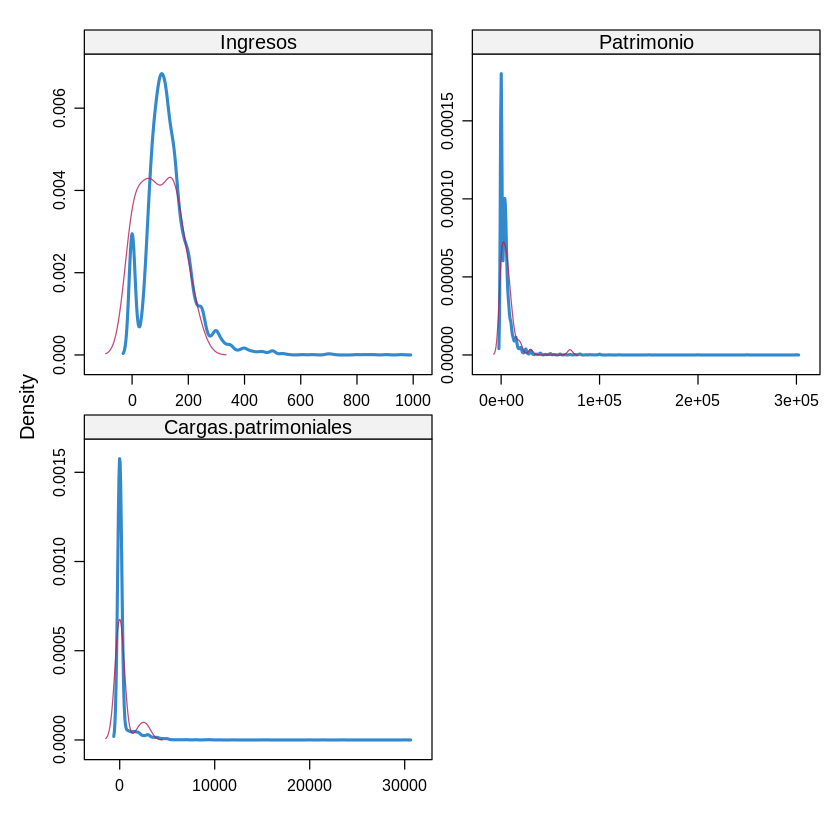

In [21]:
#########################################################################################################################
#REVISAMOS ESTOS DATOS CON EL ALGORITMO MIXTO : KNN with Random_Forest, con el fin de si tenemos un ajuste mejor de los NA:
########################################################################################################################
install.packages("mice")

k=1
set.seed(17)
library(mice)

imp = mice(Data,m=k)                                                            #le paso los datos  "Data"
DataMice = complete(imp, action="long")                                         #base de datos imputada
dim(Data)                                                                       #dimension de los datos
dim(DataMice)                                                                   # dimension de la base imputada

summary(DataMice)                                                               #generamos un summary para mirar como est�n los datos
densityplot(imp)
view(DataMice)

#PRIMERAS CONCLUSIONES: El algoritmo MICE no me est� ajustado bien los datos como es el Patrimonio y las Cargas.Patrimoniales
#Se imputaron los NA con los vecinos cercanos con k = 1. Vamos a probar con k=5



 iter imp variable
  1   1  Ingresos  Patrimonio  Cargas.patrimoniales
  1   2  Ingresos  Patrimonio  Cargas.patrimoniales
  1   3  Ingresos  Patrimonio  Cargas.patrimoniales
  1   4  Ingresos  Patrimonio  Cargas.patrimoniales
  1   5  Ingresos  Patrimonio  Cargas.patrimoniales
  2   1  Ingresos  Patrimonio  Cargas.patrimoniales
  2   2  Ingresos  Patrimonio  Cargas.patrimoniales
  2   3  Ingresos  Patrimonio  Cargas.patrimoniales
  2   4  Ingresos  Patrimonio  Cargas.patrimoniales
  2   5  Ingresos  Patrimonio  Cargas.patrimoniales
  3   1  Ingresos  Patrimonio  Cargas.patrimoniales
  3   2  Ingresos  Patrimonio  Cargas.patrimoniales
  3   3  Ingresos  Patrimonio  Cargas.patrimoniales
  3   4  Ingresos  Patrimonio  Cargas.patrimoniales
  3   5  Ingresos  Patrimonio  Cargas.patrimoniales
  4   1  Ingresos  Patrimonio  Cargas.patrimoniales
  4   2  Ingresos  Patrimonio  Cargas.patrimoniales
  4   3  Ingresos  Patrimonio  Cargas.patrimoniales
  4   4  Ingresos  Patrimonio  Cargas.patrim

[1] 4455   14

[1] 4455   16

      .imp        .id       Dictamen Antiguedad.Trabajo Vivienda
 Min.   :1   Min.   :   1   1:3200   Min.   : 0.000     1: 973  
 1st Qu.:1   1st Qu.:1114   2:1255   1st Qu.: 2.000     2:2107  
 Median :1   Median :2228            Median : 5.000     3: 247  
 Mean   :1   Mean   :2228            Mean   : 7.987     4:  20  
 3rd Qu.:1   3rd Qu.:3342            3rd Qu.:12.000     5: 783  
 Max.   :1   Max.   :4455            Max.   :48.000     6: 325  
     Plazo            Edad       Estado.civil Registros Tipo.trabajo
 Min.   : 6.00   Min.   :18.00   1: 979       1:3682    1:2806      
 1st Qu.:36.00   1st Qu.:28.00   2:3241       2: 773    2: 452      
 Median :48.00   Median :36.00   3:  67                 3:1026      
 Mean   :46.44   Mean   :37.08   4: 130                 4: 171      
 3rd Qu.:60.00   3rd Qu.:45.00   5:  38                             
 Max.   :72.00   Max.   :68.00                                      
     Gastos          Ingresos       Patrimonio     Cargas.patr

Dictamen Antiguedad.Trabajo Vivienda Plazo Edad Estado.civil Registros
30   2         0                 6        48    37   1            1        
240  1         3                 6        24    42   1            1        
394  2         1                 2        36    52   2            2        
735  2        30                 2        18    57   2            2        
804  1         6                 5        24    25   1            1        
1060 1         6                 6        12    25   1            1        
1129 1        14                 2        60    56   2            2        
1307 1        12                 2        36    41   2            1        
1421 2         0                 2        60    36   2            2        
1437 1         5                 1        24    29   2            1        
1456 2         2                 2        36    19   1            2        
1473 1        15                 2        60    40   2            2        
1535 2         1                 2        60    39   2            1        
1544 2        10                 2        36    43   2            1        
1583 2        10                 5        12    25   1            1        
1598 1         3                 2        36    36   2            1        
1670 1         2                 5        48    20   1            1        
1677 2         4                 6        48    47   2            2        
1771 1         3                 1        48    51   2            1        
1802 1         0                 5        24    21   1            1        
1807 2         0                 1        60    35   2            1        
1812 1        14                 2        24    50   2            1        
1845 2         1                 1        24    31   4            1        
1851 1        22                 2        36    50   2            1        
1878 2        12                 3        24    28   2            1        
1893 2        27                 2        18    47   2            2        
2025 1         0                 2        48    47   1            1        
2042 2         2                 1        60    54   2            1        
2074 1         1                 3        36    27   2            1        
2083 2         3                 3        30    22   1            1        
⋮    ⋮        ⋮                  ⋮        ⋮     ⋮    ⋮            ⋮        
2983 2         5                 2        36    35   4            1        
2996 2        10                 6        18    47   2            2        
3053 1        12                 3        60    45   2            1        
3183 1         3                 2        48    25   2            2        
3196 1        25                 2        36    53   2            1        
3218 2        14                 2        36    31   2            1        
3229 2        20                 2        24    59   1            1        
3331 1         2                 5        60    31   2            1        
3383 1         0                 1        60    44   2            1        
3441 1        12                 2        36    47   2            1        
3514 2         2                 1        60    32   2            2        
3535 2         1                 2        36    41   1            2        
3550 1        23                 1        60    43   2            1        
3648 1        22                 2        48    40   2            1        
3653 2         0                 6        60    32   1            1        
3662 2         5                 2        60    39   1            2        
3822 1        10                 2        24    50   2            1        
3851 1         3                 5        48    20   1            1        
4036 1         2                 1        60    38   1            1        
4075 2         8                 2        60    64   2            1        
4077 2         0                 5        60    26   

.imp .id  Dictamen Antiguedad.Trabajo Vivienda Plazo Edad Estado.civil
30   1      30 2         0                 6        48    37   1           
240  1     240 1         3                 6        24    42   1           
394  1     394 2         1                 2        36    52   2           
735  1     735 2        30                 2        18    57   2           
804  1     804 1         6                 5        24    25   1           
1060 1    1060 1         6                 6        12    25   1           
1129 1    1129 1        14                 2        60    56   2           
1307 1    1307 1        12                 2        36    41   2           
1421 1    1421 2         0                 2        60    36   2           
1437 1    1437 1         5                 1        24    29   2           
1456 1    1456 2         2                 2        36    19   1           
1473 1    1473 1        15                 2        60    40   2           
1535 1    1535 2         1                 2        60    39   2           
1544 1    1544 2        10                 2        36    43   2           
1583 1    1583 2        10                 5        12    25   1           
1598 1    1598 1         3                 2        36    36   2           
1670 1    1670 1         2                 5        48    20   1           
1677 1    1677 2         4                 6        48    47   2           
1771 1    1771 1         3                 1        48    51   2           
1802 1    1802 1         0                 5        24    21   1           
1807 1    1807 2         0                 1        60    35   2           
1812 1    1812 1        14                 2        24    50   2           
1845 1    1845 2         1                 1        24    31   4           
1851 1    1851 1        22                 2        36    50   2           
1878 1    1878 2        12                 3        24    28   2           
1893 1    1893 2        27                 2        18    47   2           
2025 1    2025 1         0                 2        48    47   1           
2042 1    2042 2         2                 1        60    54   2           
2074 1    2074 1         1                 3        36    27   2           
2083 1    2083 2         3                 3        30    22   1           
⋮    ⋮    ⋮    ⋮        ⋮                  ⋮        ⋮     ⋮    ⋮           
2983 1    2983 2         5                 2        36    35   4           
2996 1    2996 2        10                 6        18    47   2           
3053 1    3053 1        12                 3        60    45   2           
3183 1    3183 1         3                 2        48    25   2           
3196 1    3196 1        25                 2        36    53   2           
3218 1    3218 2        14                 2        36    31   2           
3229 1    3229 2        20                 2        24    59   1           
3331 1    3331 1         2                 5        60    31   2           
3383 1    3383 1         0                 1        60    44   2           
3441 1    3441 1        12                 2        36    47   2           
3514 1    3514 2         2                 1        60    32   2           
3535 1    3535 2         1                 2        36    41   1           
3550 1    3550 1        23                 1        60    43   2           
3648 1    3648 1        22                 2        48    40   2           
3653 1    3653 2         0                 6        60    32   1           
3662 1    3662 2         5                 2        60    39   1           
3822 1    3822 1        10                 2        24    50   2           
3851 1    3851 1         3                 5        48    20   1           
4036 1    4036 1         2                 1        60    38   1           
4075 1    4075 2         8                 2        60    64   2           
4077 1    4077 2         0                 5        6

.imp .id  Dictamen Antiguedad.Trabajo Vivienda Plazo Edad Estado.civil
1    1     1   1         9                 1        60    30   2           
2    1     2   1        17                 1        60    58   3           
3    1     3   2        10                 2        36    46   2           
4    1     4   1         0                 1        60    24   1           
5    1     5   1         0                 1        36    26   1           
6    1     6   1         1                 2        60    36   2           
7    1     7   1        29                 2        60    44   2           
8    1     8   1         9                 5        12    27   1           
9    1     9   1         0                 2        60    32   2           
10   1    10   2         0                 5        48    41   2           
11   1    11   1         6                 2        48    34   2           
12   1    12   1         7                 2        36    29   2           
13   1    13   1         8                 2        60    30   2           
14   1    14   1        19                 3        36    37   2           
15   1    15   2         0                 6        18    21   1           
16   1    16   1         0                 2        24    68   2           
17   1    17   1        15                 3        24    52   1           
18   1    18   1        33                 1        24    68   2           
19   1    19   2         0                 4        48    36   2           
20   1    20   1         1                 5        60    31   1           
21   1    21   2         2                 1        60    25   1           
22   1    22   1         5                 2        60    22   1           
23   1    23   2         1                 2        60    45   2           
24   1    24   1        27                 1        60    41   2           
25   1    25   1        26                 2        60    51   2           
26   1    26   1        12                 2        36    54   2           
27   1    27   1        19                 2        60    43   1           
28   1    28   1        15                 2        36    43   2           
29   1    29   2         3                 2        24    23   2           
30   1    30   2         0                 6        48    37   1           
⋮    ⋮    ⋮    ⋮        ⋮                  ⋮        ⋮     ⋮    ⋮           
4426 1    4426 1         6                 2        60    43   2           
4427 1    4427 1         1                 2        36    26   2           
4428 1    4428 1        34                 2        60    50   2           
4429 1    4429 1        20                 2        48    47   2           
4430 1    4430 1         6                 2        60    26   2           
4431 1    4431 2         4                 3        36    38   2           
4432 1    4432 1         3                 2        24    64   2           
4433 1    4433 2         0                 1        60    36   2           
4434 1    4434 1         8                 2        48    40   1           
4435 1    4435 2         8                 2        36    51   3           
4436 1    4436 1         6                 5        60    31   2           
4437 1    4437 2         3                 1        48    26   2           
4438 1    4438 2         1                 5        48    18   1           
4439 1    4439 1         4                 4        18    37   2           
4440 1    4440 2         8                 2        60    37   2           
4441 1    4441 1        20                 2        60    38   2           
4442 1    4442 1         3                 2        42    41   2           
4443 1    4443 1        10                 2        60    33   1           
4444 1    4444 2         2                 2        60    31   4           
4445 1    4445 1         1                 2        60    31   3           
4446 1    4446 2         6                 5        6

.id  Dictamen Antiguedad.Trabajo Vivienda Plazo Edad Estado.civil
1     1   1         9                 1        60    30   2           
2     2   1        17                 1        60    58   3           
3     3   2        10                 2        36    46   2           
4     4   1         0                 1        60    24   1           
5     5   1         0                 1        36    26   1           
6     6   1         1                 2        60    36   2           
7     7   1        29                 2        60    44   2           
8     8   1         9                 5        12    27   1           
9     9   1         0                 2        60    32   2           
10   10   2         0                 5        48    41   2           
11   11   1         6                 2        48    34   2           
12   12   1         7                 2        36    29   2           
13   13   1         8                 2        60    30   2           
14   14   1        19                 3        36    37   2           
15   15   2         0                 6        18    21   1           
16   16   1         0                 2        24    68   2           
17   17   1        15                 3        24    52   1           
18   18   1        33                 1        24    68   2           
19   19   2         0                 4        48    36   2           
20   20   1         1                 5        60    31   1           
21   21   2         2                 1        60    25   1           
22   22   1         5                 2        60    22   1           
23   23   2         1                 2        60    45   2           
24   24   1        27                 1        60    41   2           
25   25   1        26                 2        60    51   2           
26   26   1        12                 2        36    54   2           
27   27   1        19                 2        60    43   1           
28   28   1        15                 2        36    43   2           
29   29   2         3                 2        24    23   2           
30   30   2         0                 6        48    37   1           
⋮    ⋮    ⋮        ⋮                  ⋮        ⋮     ⋮    ⋮           
4426 4426 1         6                 2        60    43   2           
4427 4427 1         1                 2        36    26   2           
4428 4428 1        34                 2        60    50   2           
4429 4429 1        20                 2        48    47   2           
4430 4430 1         6                 2        60    26   2           
4431 4431 2         4                 3        36    38   2           
4432 4432 1         3                 2        24    64   2           
4433 4433 2         0                 1        60    36   2           
4434 4434 1         8                 2        48    40   1           
4435 4435 2         8                 2        36    51   3           
4436 4436 1         6                 5        60    31   2           
4437 4437 2         3                 1        48    26   2           
4438 4438 2         1                 5        48    18   1           
4439 4439 1         4                 4        18    37   2           
4440 4440 2         8                 2        60    37   2           
4441 4441 1        20                 2        60    38   2           
4442 4442 1         3                 2        42    41   2           
4443 4443 1        10                 2        60    33   1           
4444 4444 2         2                 2        60    31   4           
4445 4445 1         1                 2        60    31   3           
4446 4446 2         6                 5        60    22   1           
4447 4447 1        23                 2        60    50   2           
4448 4448 1         6                 2        48    52   2           
4449 4449 1         3                 2        60    49   2           
4450 4450 2         1        

 Dictamen Antiguedad.Trabajo Vivienda     Plazo            Edad      
 1:3200   Min.   : 0.000     1: 973   Min.   : 6.00   Min.   :18.00  
 2:1255   1st Qu.: 2.000     2:2107   1st Qu.:36.00   1st Qu.:28.00  
          Median : 5.000     3: 247   Median :48.00   Median :36.00  
          Mean   : 7.987     4:  20   Mean   :46.44   Mean   :37.08  
          3rd Qu.:12.000     5: 783   3rd Qu.:60.00   3rd Qu.:45.00  
          Max.   :48.000     6: 325   Max.   :72.00   Max.   :68.00  
 Estado.civil Registros Tipo.trabajo     Gastos          Ingresos    
 1: 979       1:3682    1:2806       Min.   : 35.00   Min.   :  0.0  
 2:3241       2: 773    2: 452       1st Qu.: 35.00   1st Qu.: 80.0  
 3:  67                 3:1026       Median : 51.00   Median :120.0  
 4: 130                 4: 171       Mean   : 55.57   Mean   :130.3  
 5:  38                              3rd Qu.: 72.00   3rd Qu.:165.0  
                                     Max.   :180.00   Max.   :959.0  
   Patrimonio     Ca

Dictamen Antiguedad.Trabajo Vivienda Plazo Edad Estado.civil Registros
1    1         9                 1        60    30   2            1        
2    1        17                 1        60    58   3            1        
3    2        10                 2        36    46   2            2        
4    1         0                 1        60    24   1            1        
5    1         0                 1        36    26   1            1        
6    1         1                 2        60    36   2            1        
7    1        29                 2        60    44   2            1        
8    1         9                 5        12    27   1            1        
9    1         0                 2        60    32   2            1        
10   2         0                 5        48    41   2            1        
11   1         6                 2        48    34   2            1        
12   1         7                 2        36    29   2            1        
13   1         8                 2        60    30   2            1        
14   1        19                 3        36    37   2            1        
15   2         0                 6        18    21   1            2        
16   1         0                 2        24    68   2            1        
17   1        15                 3        24    52   1            1        
18   1        33                 1        24    68   2            1        
19   2         0                 4        48    36   2            1        
20   1         1                 5        60    31   1            1        
21   2         2                 1        60    25   1            1        
22   1         5                 2        60    22   1            1        
23   2         1                 2        60    45   2            1        
24   1        27                 1        60    41   2            1        
25   1        26                 2        60    51   2            1        
26   1        12                 2        36    54   2            1        
27   1        19                 2        60    43   1            1        
28   1        15                 2        36    43   2            1        
29   2         3                 2        24    23   2            1        
30   2         0                 6        48    37   1            1        
⋮    ⋮        ⋮                  ⋮        ⋮     ⋮    ⋮            ⋮        
4426 1         6                 2        60    43   2            2        
4427 1         1                 2        36    26   2            1        
4428 1        34                 2        60    50   2            2        
4429 1        20                 2        48    47   2            1        
4430 1         6                 2        60    26   2            1        
4431 2         4                 3        36    38   2            1        
4432 1         3                 2        24    64   2            1        
4433 2         0                 1        60    36   2            2        
4434 1         8                 2        48    40   1            1        
4435 2         8                 2        36    51   3            1        
4436 1         6                 5        60    31   2            1        
4437 2         3                 1        48    26   2            2        
4438 2         1                 5        48    18   1            1        
4439 1         4                 4        18    37   2            1        
4440 2         8                 2        60    37   2            1        
4441 1        20                 2        60    38   2            1        
4442 1         3                 2        42    41   2            1        
4443 1        10                 2        60    33   1            1        
4444 2         2                 2        60    31   4            1        
4445 1         1                 2        60    31   3            2        
4446 2         6                 5        60    22   

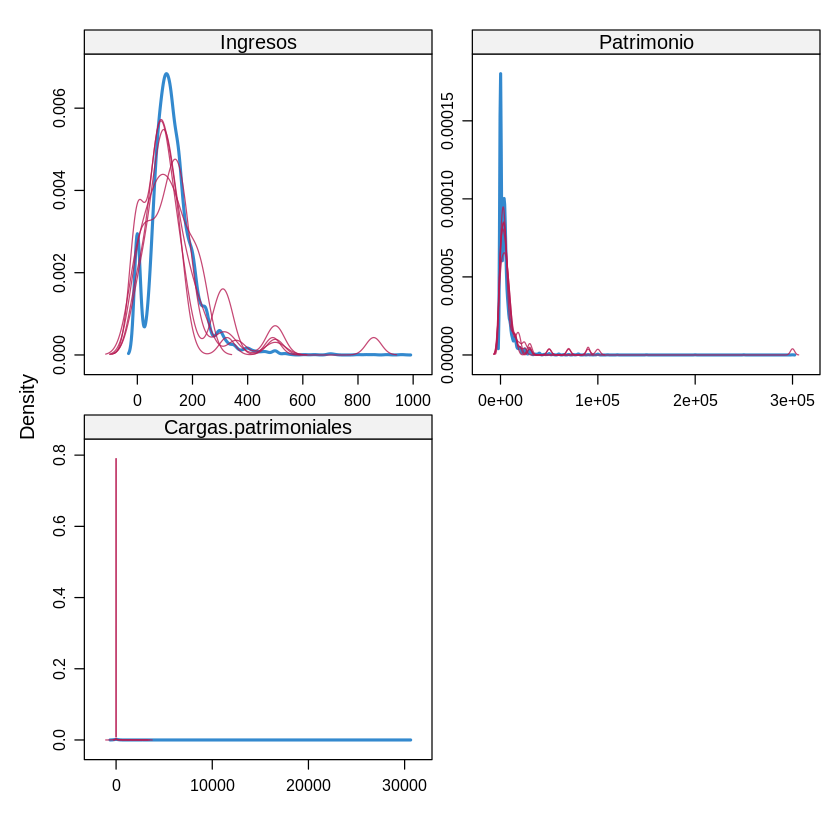

In [22]:

k=5
set.seed(17)
library(mice)

imp = mice(Data,m=k)                                                            #le paso los datos  "df"
df_imp = complete(imp, action="long")                                           #base de datos imputada
dim(Data)                                                                       #dimension de los datos
dim(DataMice)                                                                   # dimension de la base imputada

summary(DataMice)                                                               #generamos un summary para mirar como est�n los datos
densityplot(imp)


#REVISI�N DE LOS DATOS:
Data[mis_ind>0,]
DataMice[mis_ind>0,]
View(DataMice)

DataMice <- DataMice[,-1]                                                       #quitamos la columna .imp
View(DataMice)
DataMice <- DataMice[,-1]                                                       #quitamos la columna .id
summary(DataMice)
View(DataMice)

#El algoritmo MICE me est� dando valores menores a los valores del modelo KNN o la regresi�n Random Forest
#Como son pocos datos con MISSING DATA, dejamos los datos escogiendo el resultado que nos arroj� MICE.

#NO ELIMINAR las filas que tiene registros en NA .�������������������������������������


In [23]:

#Missing Values: Tratamiento en diferentes escenarios
library(tidyverse)
var_na <- map_dbl(DataMice, .f = function(x){sum(is.na(x))})
var_na
names(var_na)
round(var_na/nrow(df)*100,2)


str(DataMice)                                                                   #revisamos los datos
summary(DataMice)                                                               #resumen


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ lubridate 1.9.2     ✔ stringr   1.5.0
✔ purrr     1.0.2     ✔ tibble    3.2.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ mice::filter() masks dplyr::filter(), stats::filter()
✖ dplyr::lag()   masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Dictamen         Antiguedad.Trabajo 
                         0                          0 
                  Vivienda                      Plazo 
                         0                          0 
                      Edad               Estado.civil 
                         0                          0 
                 Registros               Tipo.trabajo 
                         0                          0 
                    Gastos                   Ingresos 
                         0                          0 
                Patrimonio       Cargas.patrimoniales 
                         0                          0 
        Importe.solicitado Precio.del.bien.financiado 
                         0                          0

[1] "Dictamen"                   "Antiguedad.Trabajo"        
 [3] "Vivienda"                   "Plazo"                     
 [5] "Edad"                       "Estado.civil"              
 [7] "Registros"                  "Tipo.trabajo"              
 [9] "Gastos"                     "Ingresos"                  
[11] "Patrimonio"                 "Cargas.patrimoniales"      
[13] "Importe.solicitado"         "Precio.del.bien.financiado"

numeric(0)

'data.frame':	4455 obs. of  14 variables:
 $ Dictamen                  : Factor w/ 2 levels "1","2": 1 1 2 1 1 1 1 1 1 2 ...
 $ Antiguedad.Trabajo        : int  9 17 10 0 0 1 29 9 0 0 ...
 $ Vivienda                  : Factor w/ 6 levels "1","2","3","4",..: 1 1 2 1 1 2 2 5 2 5 ...
 $ Plazo                     : int  60 60 36 60 36 60 60 12 60 48 ...
 $ Edad                      : int  30 58 46 24 26 36 44 27 32 41 ...
 $ Estado.civil              : Factor w/ 5 levels "1","2","3","4",..: 2 3 2 1 1 2 2 1 2 2 ...
 $ Registros                 : Factor w/ 2 levels "1","2": 1 1 2 1 1 1 1 1 1 1 ...
 $ Tipo.trabajo              : Factor w/ 4 levels "1","2","3","4": 3 1 3 1 1 1 1 1 3 2 ...
 $ Gastos                    : int  73 48 90 63 46 75 75 35 90 90 ...
 $ Ingresos                  : int  129 131 200 182 107 214 125 80 107 80 ...
 $ Patrimonio                : int  0 0 3000 2500 0 3500 10000 0 15000 0 ...
 $ Cargas.patrimoniales      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Importe.solicitado    

 Dictamen Antiguedad.Trabajo Vivienda     Plazo            Edad      
 1:3200   Min.   : 0.000     1: 973   Min.   : 6.00   Min.   :18.00  
 2:1255   1st Qu.: 2.000     2:2107   1st Qu.:36.00   1st Qu.:28.00  
          Median : 5.000     3: 247   Median :48.00   Median :36.00  
          Mean   : 7.987     4:  20   Mean   :46.44   Mean   :37.08  
          3rd Qu.:12.000     5: 783   3rd Qu.:60.00   3rd Qu.:45.00  
          Max.   :48.000     6: 325   Max.   :72.00   Max.   :68.00  
 Estado.civil Registros Tipo.trabajo     Gastos          Ingresos    
 1: 979       1:3682    1:2806       Min.   : 35.00   Min.   :  0.0  
 2:3241       2: 773    2: 452       1st Qu.: 35.00   1st Qu.: 80.0  
 3:  67                 3:1026       Median : 51.00   Median :120.0  
 4: 130                 4: 171       Mean   : 55.57   Mean   :130.3  
 5:  38                              3rd Qu.: 72.00   3rd Qu.:165.0  
                                     Max.   :180.00   Max.   :959.0  
   Patrimonio     Ca

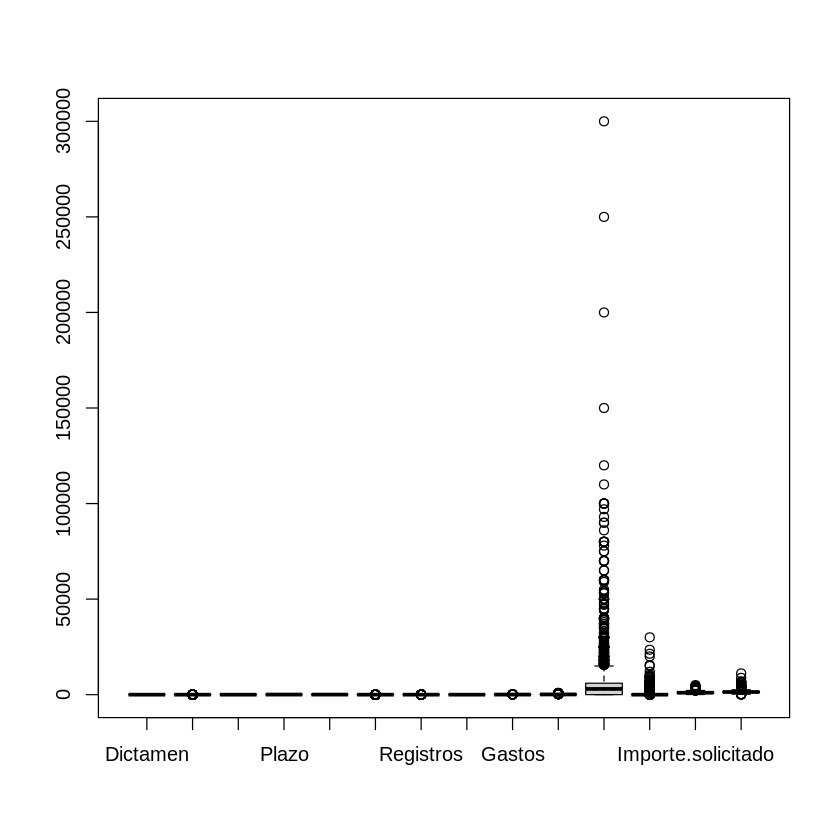

In [24]:

#########################################################################################################################
#                                                   Revisar si hay OUTLIERS en la data:
#########################################################################################################################

bk <- DataMice                                                                  #Backup

#la nueva variable que tiene los datos guardados es df_imp_mice
boxplot(DataMice, cex.axi=0.5)                                                  #Diagrama de Cajas general
boxplot(DataMice)


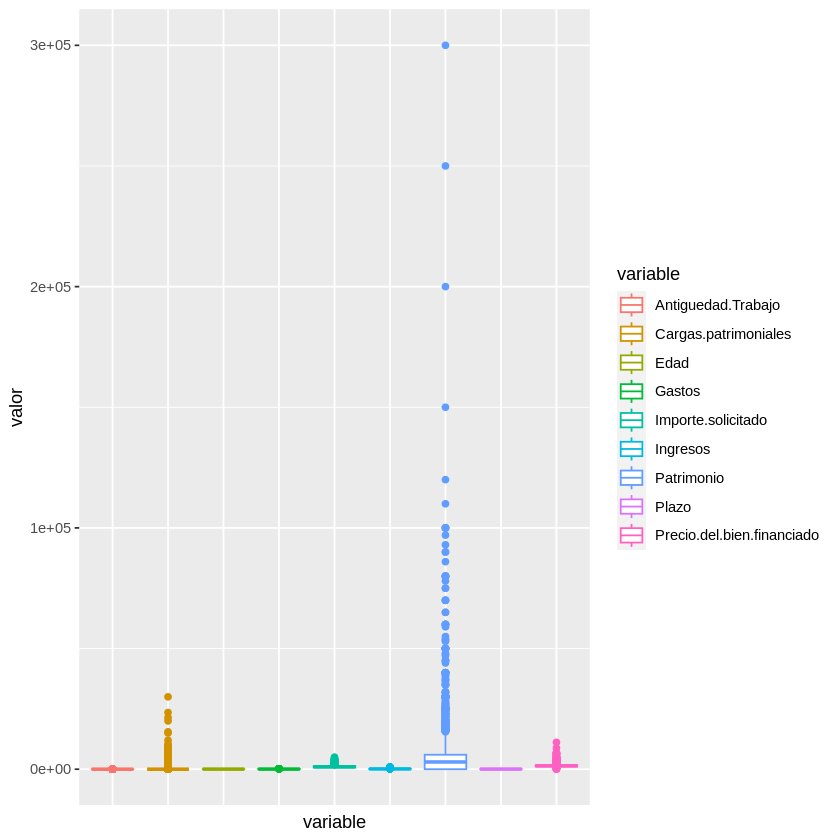

In [25]:

#Diagrama de Cajas por Variables
DataMice %>% pivot_longer(-c(Dictamen, Vivienda, Estado.civil, Registros, Tipo.trabajo), names_to = "variable", values_to = "valor") %>%
  ggplot(aes(x = variable, y=valor, color=variable)) +
  geom_boxplot() +
  #theme(axis.text.x = element_text(angle = 90))
  theme(axis.text.x=element_blank(), #remove x axis labels
        axis.ticks.x=element_blank(), #remove x axis ticks
        #axis.text.y=element_blank(),  #remove y axis labels
        #axis.ticks.y=element_blank()  #remove y axis ticks
  )


In [26]:

boxplot.stats(DataMice$Cargas.patrimoniales)$out                                #Se detectaron 3 par�metros con datos outliers
boxplot.stats(DataMice$Patrimonio)$out
boxplot.stats(DataMice$Precio.del.bien.financiado)$out
#Lo anterior me sirve para identificar los registros que est�n por fueran del BOXPLOT


[1]  2500   260  2000   500  3300  3000  4500  1000  1200   800  4000  3000
 [13] 21400  1000  1400  3000  2500   400  1500  1000  3000  9000  2500  2000
 [25]  1947  2000   900   200 15500   120    96  3700  4000   700   250   900
 [37]   500  4000   200  1500  1000  3500   300   266  4200   500   480   200
 [49]   100  3000  1700   400  3600  1300  3700   500  1000  2000   400   600
 [61]  3500  2500  1749   750  3000   250  1260    75  2800   600  1500   300
 [73]  3300   720  2000   250  1000    34  1500 20000  4500   450  1500  1500
 [85]  1810  2500   100  2000   900  9000  3000   500  4500   800  1500  4800
 [97]   400  1800  1300  1000   300   400   300  2000   500    50  2400  2000
[109]  1950  1978  1500   200  2000  1300  2160  3000  1440   300  6000  5000
[121]     1  2500  2000  5000  2500  2800  1900  4000  2900  2900  1728   350
[133]   900  2000  4000  1200   200   400  4090   435  1500  2000   700  1200
[145]  7000  3000   600   500   550  1500  2350  3900   200   500  1641  1500
[157]  1300   400  9700  4000  2000  1300  1500  3800  1000  3500  1500   300
[169]  1200   560  9300   400   700   450  3650  2000  2050   200  1100  2000
[181]  1500  6300   500  1800  3300   198  1200   850   800  3500  2000  1300
[193]  1200  1700  1000   575  5000  1600  1500  3600   600  2000  1620   200
[205]  3000  1600  1980  1200   700  2000    80  2040  1800  2800  1000  2432
[217]  1500   700  3000  3300  2300   300   150   800  9500  2400  1100   250
[229]  1500   290  1200  2500  1000   130  3000   250   250   606  1500  2000
[241]   600   300   600  1500  3000   400  2400 30000  3400  1300   500  1500
[253]   700   400 15000  1800  2700  2000  3648  1000  1100   800   108  2500
[265]  1500  2700  3378  1000   470   125   144  3000  1000  1000  2000    80
[277]  1680  3000  1200   850  3000  4000   420  1500   192  4500   800   750
[289]  1500  3000  2000  1200  1000  1800   350  2000   800    10   100  3000
[301]  1500  1700  1200  1000   500  2000   300  2000  1500    40     1    29
[313]  3000  4000  1365  2000  3000   800   500  1000  2500   100  1800  1500
[325]   325  1500  2000  2000  4000  3500   792    39   700  1100   100  2000
[337]  2000    50  1000  2880  2900  4500  1000   300  5000   400  2100  3000
[349]   700   200   672  1200   280   770  2700   198  1500  1000  1100   100
[361]  2000  1600  2686   500  1485  1000   750   900  1000   300  5700   800
[373]  1400  1500  7000  3000  3900    30 10500  1950  8000  2000    50   200
[385]   192  1408  4500  3200  2500   300  1300  1500  2969   800   800   270
[397]   400   200  4000  1700   600   400  1200  2500    90  1800    50  1000
[409]   720  1100  3800  7000  2400  8000  2000  1394    30  2400  1172   500
[421]   150  3000   180  3360  3000  2000  3000   144    50  2200   200  1600
[433]  1379   500  2000  1300   250  1700  2200   800  2800   991  3500   350
[445]   800  2000   300  3000   360  3000  2300  3700   670   600   108  3530
[457]  4000  4350   450   100   400  2000  3055  5000  3500  1250  2640   700
[469]  3000   500  2500   360  3300  2000   200  4800  2600  3000   450   108
[481]  1600  2500   850    96   840   800  3000  1000  2300    90  2500  1781
[493]  2500  3500  3300  1000   300   600  6300  4000   500   900  1400  1000
[505]  2520  3000  3000  2000  4800  1500   400  5500  4000  1500  1000   300
[517]   500  1600  2000  1700  1500  3500  3000    80   700  2000  1500  3500
[529]   750  1600  2400  4000   350  2000   800  1200  1000   500  2400   540
[541]   240  1600   350  3130  2500    51  4380  2880   270   900  2500  3000
[553]   500  3700  1200  8000   400   200   870   300   900  2200   900   800
[565]  1600   350   700  2000  2000   300    12  9500   600  2000  1500  2235
[577]  1500  2500   900  1751  2000  1500   270  4500  3000   900   500   480
[589]   500  1690  2000  1125  2000   720  3000   700  5000  2000  1300  1380
[601]   933   100  1000  1500  1700  1857  1300   112   480  1100   500  3600
[613]    30  1300  1500 

[1]  16500  50000  15900  30000  25000 200000  24000 150000  50000  16000
 [11]  86000  25300 100000  30000  23000  16000  16000  40000  35000  75000
 [21]  22000  22000  32000 100000 100000  20000  20000  16000  18000  30000
 [31]  20000  21500  15500  30000  20500  27000  90000  16000  97000  20000
 [41]  32000  20000  18000  16000  18000  30000  16000  30000  20000  16000
 [51]  16000  30000  16500  22000  30000 100000  40000  25000  70000  17000
 [61]  50000  17000  20000  22000  25000  20000  18000  22000  20000  60000
 [71]  17000  39000  20000  19000  30000  18000  29000  60000  17000  17000
 [81]  40000  31000  80000  20000  16000  18000  16000  18000  17000  25000
 [91]  50000  21000  27000  20000  20000  17000  20000  17000  16000  25000
[101]  18000  40000  20500  93000  27000  80000  25000  25000  17000  25000
[111]  30000  16000 300000  75000  50000  24000  18000  70000  20000  20000
[121]  20000  60000 250000  30000  26000  35000  25000  40000  20000  28000
[131]  30000  36000  55000  24000  18000  30000  50000  20000  19000  18000
[141]  21500  19000  26000  48000  27000  30000  18000  65000  30000  19000
[151]  16000  20000  90000  50000  47500  25000  65000  20000  16000  32000
[161]  16000  25000  28000  45000  15750  23000  16000  30000  47000 100000
[171]  20000  60000  18000  20000  20000  32000  29500  16000  18000  23000
[181]  39000  20000  45000  37000  19400  20000  25000  17000  80000  18500
[191]  18000  18000  40000  80000  25000  25000  16200  44000  20000  38000
[201]  24000  25000  80000  25000  20000  17000  25000  25000  21000  25000
[211]  35000  18000  40000  18000  30000 110000  25000  30000  26000  30000
[221]  30000  20000  25000  50000  17000  16000  23000  18500  25000  45000
[231]  25000  20000  35000  20000  25000  37000  17000  20000  20000  18000
[241]  40000  25000  70000  20000  54000  37000  23000  30000  25000  17000
[251]  16000  53000  18000  25000  25000  18000  30000  18000  17000  78000
[261]  18000  59000 120000  25000  30000  20000  80000  30000  19000  23000
[271]  16500  53500  19000  70000  20000  20000  60000  30000  24000  26000
[281]  40000  40000

[1]  2985  2557  3262  4786  8800  5200  2886  2624  4100  4138  2673  3300
 [13]  2610  3750  2700  2600  2646  2625  2624  2640  2755  2810  4063  6802
 [25]  3400  2600  2600  4575  2800  3190  3070  2610  2679   105  2588  2750
 [37]  2675  2946  2875   125  5852  2676  2758  4812  2628  3400  3650  2961
 [49]  2977  2631  3350  3669  3313  2659  2850  3088  2654  2684  3081  3959
 [61]  3560  2971   225  2976  3467  6500  4500  3318  2664  3400  2860  2580
 [73]  2700  4200  3700  2700  4600   250  2575  2600  2622  2730  6700  3900
 [85]  2957  5175  2700  3300  2612  2981  4904  2676  2750  2936  2997  4400
 [97]  2700  2800  2626  6222 11140   240  2738  2755  3569   175  3559  3058
[109]  2605  2950  6146  3295  2963  2599   240  2906  2995  4300  4769  2700
[121]  2800  2960  4400  2600  3300  6468  3626  6900  3120  2700   200  3690
[133]  2885  3500  2965  3782  2848  2600  2570  2750  2724  3400  2700  3429
[145]  2724  2758  2684  4000  2600  4800  2999   125  3250  3753  4500  2700
[157]  2750  3542  2953  2700  3745  2596  2700  3000  4200  2652  4250  3100
[169]  5000  3415  3038  2554  3106  2800

In [27]:

#Variable Precio.del.bien.financiado
out <- boxplot.stats(DataMice$Precio.del.bien.financiado)$out                   #para verificar las posiciones de outliers en la variable Precio Financiado
out_PrecioFinan <- which(DataMice$Precio.del.bien.financiado %in% c(out))
out_PrecioFinan                                                                 #filas donde aparecen posible outliers en la variable Precio Financiado
#Variable Patrimonio
out <- boxplot.stats(DataMice$Patrimonio)$out                                   #para verificar las posiciones de outliers en la variable Patrimonio
out_Patrimonio <- which(DataMice$Patrimonio %in% c(out))
out_Patrimonio                                                                  #filas donde aparecen posible outliers en la variable Patrimonio
#Variable Cargas Patrimoniales
out <- boxplot.stats(DataMice$Cargas.patrimoniales)$out                         #para verificar las posiciones de outliers en la variable Cargas.Patrimonio
out_CargasPatri <- which(DataMice$Cargas.patrimoniales %in% c(out))
out_CargasPatri                                                                 #filas donde aparecen posible outliers en la variable Cargas.Patrimonio

X <- data.frame(df_imp[out_PrecioFinan,],df_imp[out_PrecioFinan,1])             #Se crean 3 dataframe
Y <- data.frame(df_imp[out_Patrimonio,],df_imp[out_Patrimonio,1])
Z <- data.frame(df_imp[out_CargasPatri,],df_imp[out_CargasPatri,1])

print(X)                                                                        #imprimir le dataframe, revisar bien los datos antes de sacar conclusiones
print(Y)
print(Z)


[1]    3   28  101  126  143  156  176  229  269  284  287  294  309  312  420
 [16]  475  483  518  587  643  672  678  693  763  767  816  859  864  889  921
 [31]  932  972 1017 1081 1161 1168 1220 1293 1306 1310 1312 1314 1320 1325 1336
 [46] 1348 1357 1484 1507 1571 1605 1614 1620 1628 1657 1682 1688 1695 1723 1738
 [61] 1788 1797 1844 1858 1883 1893 1979 2007 2010 2050 2086 2088 2109 2140 2156
 [76] 2205 2241 2282 2317 2339 2346 2375 2390 2399 2423 2476 2525 2532 2553 2558
 [91] 2563 2625 2633 2638 2644 2645 2658 2668 2689 2690 2705 2723 2735 2764 2778
[106] 2804 2816 2854 2907 2908 2951 2979 2999 3014 3088 3096 3112 3116 3139 3144
[121] 3237 3264 3277 3288 3304 3306 3337 3339 3348 3365 3405 3494 3508 3516 3530
[136] 3543 3557 3572 3593 3617 3663 3666 3667 3674 3678 3695 3704 3730 3745 3774
[151] 3777 3781 3799 3857 3929 3944 3947 3952 4009 4028 4069 4075 4076 4123 4276
[166] 4350 4359 4365 4370 4387 4393 4412 4415 4424

[1]   17   43   47   79   94  126  134  143  144  163  166  177  219  232  256
 [16]  269  272  284  286  294  314  320  391  394  399  408  415  481  494  555
 [31]  563  569  586  614  620  644  648  665  667  692  698  708  718  729  755
 [46]  763  781  791  813  822  829  837  838  839  845  873  878  921  964 1037
 [61] 1042 1043 1054 1073 1100 1148 1151 1159 1195 1208 1223 1233 1257 1258 1277
 [76] 1315 1325 1346 1348 1364 1365 1370 1392 1428 1436 1465 1473 1484 1486 1502
 [91] 1533 1536 1548 1551 1568 1609 1630 1639 1647 1651 1674 1676 1677 1682 1684
[106] 1693 1702 1710 1733 1769 1792 1797 1802 1809 1817 1851 1858 1893 1932 1936
[121] 1943 1960 1972 1973 2003 2008 2009 2024 2025 2069 2071 2085 2089 2109 2120
[136] 2128 2139 2176 2189 2200 2205 2240 2255 2277 2288 2310 2317 2331 2334 2363
[151] 2366 2383 2390 2403 2464 2485 2494 2513 2521 2525 2532 2568 2611 2619 2638
[166] 2645 2647 2653 2655 2657 2673 2676 2678 2692 2702 2708 2737 2742 2747 2748
[181] 2778 2866 2872 2873 2896 2909 2917 2923 2924 2926 2929 2930 2944 2954 2971
[196] 2979 2997 3008 3036 3040 3047 3049 3051 3052 3064 3069 3110 3121 3157 3223
[211] 3227 3229 3233 3264 3277 3304 3325 3327 3339 3348 3353 3365 3415 3439 3451
[226] 3453 3464 3466 3467 3494 3524 3538 3539 3564 3568 3608 3636 3654 3681 3687
[241] 3730 3732 3739 3742 3745 3758 3760 3770 3806 3822 3857 3892 3932 3950 3998
[256] 4016 4056 4058 4069 4086 4089 4123 4130 4133 4142 4155 4199 4254 4255 4266
[271] 4269 4290 4329 4338 4361 4370 4377 4387 4404 4412 4421 4442

[1]   13   14   18   23   31   44   47   51   54   72   74   86   94  103  109
 [16]  112  113  116  120  121  123  134  137  142  145  147  156  162  177  184
 [31]  187  191  197  204  206  209  221  223  229  244  245  246  255  259  264
 [46]  269  270  273  280  284  285  289  290  291  292  296  297  300  304  310
 [61]  313  320  334  338  340  344  346  352  354  358  361  364  365  366  370
 [76]  373  374  378  387  394  395  397  398  402  412  413  418  422  438  442
 [91]  451  458  460  462  466  471  476  484  489  493  495  498  522  528  537
[106]  546  554  555  569  573  575  578  580  585  602  604  606  608  611  614
[121]  615  619  638  644  645  647  649  656  667  670  672  674  695  699  708
[136]  709  717  730  741  742  744  753  756  767  768  773  779  780  783  786
[151]  787  796  805  807  811  826  832  835  839  840  843  845  849  854  855
[166]  862  868  869  871  877  878  888  893  899  906  907  921  931  933  938
[181]  941  951  961  962  981  984  987  988 1009 1030 1033 1057 1058 1070 1072
[196] 1075 1077 1084 1089 1090 1093 1108 1118 1122 1125 1134 1137 1146 1159 1162
[211] 1174 1177 1183 1185 1190 1196 1204 1206 1208 1214 1220 1222 1225 1235 1241
[226] 1245 1255 1261 1267 1268 1270 1284 1311 1317 1318 1319 1322 1342 1347 1363
[241] 1367 1372 1374 1375 1380 1385 1389 1392 1402 1404 1413 1415 1419 1424 1428
[256] 1430 1431 1434 1436 1445 1446 1448 1450 1455 1459 1468 1482 1483 1487 1496
[271] 1498 1499 1502 1503 1507 1510 1514 1535 1552 1555 1559 1565 1566 1578 1582
[286] 1588 1589 1592 1600 1609 1610 1612 1618 1620 1624 1647 1657 1658 1661 1664
[301] 1672 1674 1683 1685 1687 1688 1689 1695 1696 1713 1728 1730 1735 1736 1743
[316] 1763 1777 1784 1785 1798 1803 1808 1818 1819 1823 1825 1827 1835 1859 1863
[331] 1867 1889 1891 1896 1899 1905 1908 1915 1918 1921 1930 1939 1943 1944 1947
[346] 1951 1955 1956 1982 1984 1988 1991 1993 2014 2015 2021 2023 2026 2032 2033
[361] 2034 2049 2054 2055 2061 2068 2070 2077 2079 2090 2093 2102 2108 2111 2121
[376] 2126 2132 2135 2136 2148 2153 2160 2162 2169 2184 2189 2195 2206 2208 2217
[391] 2221 2223 2229 2239 2240 2243 2244 2266 2267 2292 2296 2313 2314 2317 2322
[406] 2330 2356 2358 2361 2375 2379 2380 2388 2403 2410 2412 2415 2428 2435 2440
[421] 2442 2447 2453 2464 2472 2479 2481 2482 2483 2486 2493 2504 2516 2532 2535
[436] 2536 2555 2561 2565 2585 2599 2600 2602 2614 2618 2632 2635 2638 2641 2653
[451] 2663 2665 2669 2670 2675 2684 2686 2693 2695 2702 2703 2708 2715 2732 2737
[466] 2740 2753 2760 2761 2784 2785 2787 2790 2802 2804 2805 2808 2825 2827 2833
[481] 2834 2840 2842 2852 2856 2865 2866 2877 2889 2893 2895 2896 2897 2932 2936
[496] 2938 2941 2942 2947 2955 2960 2961 2966 2972 2973 2976 2979 2986 2988 2991
[511] 2994 3000 3010 3015 3019 3020 3023 3027 3029 3049 3056 3066 3069 3082 3083
[526] 3092 3101 3103 3105 3107 3108 3109 3117 3119 3127 3134 3140 3150 3153 3158
[541] 3163 3166 3181 3186 3192 3195 3199 3200 3201 3209 3218 3221 3233 3234 3246
[556] 3253 3255 3262 3268 3271 3275 3280 3281 3284 3285 3301 3325 3336 3338 3339
[571] 3346 3348 3365 3369 3374 3375 3380 3381 3396 3401 3403 3404 3406 3411 3417
[586] 3426 3429 3431 3432 3433 3439 3445 3450 3456 3459 3462 3464 3465 3466 3468
[601] 3473 3485 3486 3488 3494 3502 3503 3507 3512 3517 3521 3527 3532 3546 3547
[616] 3562 3563 3570 3584 3586 3593 3596 3602 3608 3611 3617 3640 3645 3650 3654
[631] 3657 3667 3672 3676 3681 3684 3691 3696 3707 3717 3722 3728 3731 3737 3739
[646] 3746 3749 3753 3760 3765 3771 3773 3776 3792 3797 3802 3806 3808 3809 3819
[661] 3820 3821 3823 3824 3842 3857 3863 3871 3878 3886 3898 3903 3904 3906 3912
[676] 3922 3931 3934 3949 3951 3959 3960 3973 3978 3990 3994 3999 4012 4019 4021
[691] 4022 4031 4032 4039 4042 4048 4053 4057 4059 4064 4067 4074 4075 4080 4083
[706] 4090 4093 4095 4096 4100 4102 4103 4110 4114 4123 4128 4141 4143 4144 4154
[721] 4162 4166 4177 4192 4205 4206 4222 4226 4228 4246 4251 4252 4254 4256 4257
[736] 4258 4263 4264 4270 4273 42

     .imp  .id Dictamen Antiguedad.Trabajo Vivienda Plazo Edad Estado.civil
3       1    3        2                 10        2    36   46            2
28      1   28        1                 15        2    36   43            2
101     1  101        1                 38        2    48   57            2
126     1  126        1                 12        2    48   35            4
143     1  143        1                 15        2    24   54            2
156     1  156        1                  3        2    24   30            2
176     1  176        1                  9        2    36   29            1
229     1  229        1                 12        2    60   50            2
269     1  269        2                  2        2    36   33            2
284     1  284        1                 10        2    36   32            2
287     1  287        1                  5        2    24   37            2
294     1  294        1                 22        2     6   46            2
309     1  3

In [28]:

summary(DataMice)


 Dictamen Antiguedad.Trabajo Vivienda     Plazo            Edad      
 1:3200   Min.   : 0.000     1: 973   Min.   : 6.00   Min.   :18.00  
 2:1255   1st Qu.: 2.000     2:2107   1st Qu.:36.00   1st Qu.:28.00  
          Median : 5.000     3: 247   Median :48.00   Median :36.00  
          Mean   : 7.987     4:  20   Mean   :46.44   Mean   :37.08  
          3rd Qu.:12.000     5: 783   3rd Qu.:60.00   3rd Qu.:45.00  
          Max.   :48.000     6: 325   Max.   :72.00   Max.   :68.00  
 Estado.civil Registros Tipo.trabajo     Gastos          Ingresos    
 1: 979       1:3682    1:2806       Min.   : 35.00   Min.   :  0.0  
 2:3241       2: 773    2: 452       1st Qu.: 35.00   1st Qu.: 80.0  
 3:  67                 3:1026       Median : 51.00   Median :120.0  
 4: 130                 4: 171       Mean   : 55.57   Mean   :130.3  
 5:  38                              3rd Qu.: 72.00   3rd Qu.:165.0  
                                     Max.   :180.00   Max.   :959.0  
   Patrimonio     Ca

In [29]:

##############################################################################################################################
#                                 Detectando los MULTIVARIATE OUTLIERS con la distancia de MAHALANOBIS
##############################################################################################################################

#se define como est�n la distancia de los datos con respecto a cada una de las variables (DISTANCIA MULTIDIMENSIONAL)
#La distancia de Mahalanobis es una medida de distancia entre un punto y la media que se ajusta en funci�n de la correlaci�n
#entre dimensiones y que permite encontrar potenciales outliers en distribuciones multivariante

str(DataMice)                                                                   #como est� la composici�n de los datos

DataMice$Dictamen=as.numeric(DataMice$Dictamen)                                 #Convertimos en numerico a: "Dictamen" , "Vivienda","Estado Civil", "Registros", "Tipo de Trabajo"
DataMice$Vivienda=as.numeric(DataMice$Vivienda)
DataMice$Estado.civil=as.numeric(DataMice$Estado.civil)
DataMice$Registros=as.numeric(DataMice$Registros)
DataMice$Tipo.trabajo=as.numeric(DataMice$Tipo.trabajo)


'data.frame':	4455 obs. of  14 variables:
 $ Dictamen                  : Factor w/ 2 levels "1","2": 1 1 2 1 1 1 1 1 1 2 ...
 $ Antiguedad.Trabajo        : int  9 17 10 0 0 1 29 9 0 0 ...
 $ Vivienda                  : Factor w/ 6 levels "1","2","3","4",..: 1 1 2 1 1 2 2 5 2 5 ...
 $ Plazo                     : int  60 60 36 60 36 60 60 12 60 48 ...
 $ Edad                      : int  30 58 46 24 26 36 44 27 32 41 ...
 $ Estado.civil              : Factor w/ 5 levels "1","2","3","4",..: 2 3 2 1 1 2 2 1 2 2 ...
 $ Registros                 : Factor w/ 2 levels "1","2": 1 1 2 1 1 1 1 1 1 1 ...
 $ Tipo.trabajo              : Factor w/ 4 levels "1","2","3","4": 3 1 3 1 1 1 1 1 3 2 ...
 $ Gastos                    : int  73 48 90 63 46 75 75 35 90 90 ...
 $ Ingresos                  : int  129 131 200 182 107 214 125 80 107 80 ...
 $ Patrimonio                : int  0 0 3000 2500 0 3500 10000 0 15000 0 ...
 $ Cargas.patrimoniales      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Importe.solicitado    

In [30]:

summary(DataMice)


    Dictamen     Antiguedad.Trabajo    Vivienda         Plazo      
 Min.   :1.000   Min.   : 0.000     Min.   :1.000   Min.   : 6.00  
 1st Qu.:1.000   1st Qu.: 2.000     1st Qu.:2.000   1st Qu.:36.00  
 Median :1.000   Median : 5.000     Median :2.000   Median :48.00  
 Mean   :1.282   Mean   : 7.987     Mean   :2.665   Mean   :46.44  
 3rd Qu.:2.000   3rd Qu.:12.000     3rd Qu.:4.000   3rd Qu.:60.00  
 Max.   :2.000   Max.   :48.000     Max.   :6.000   Max.   :72.00  
      Edad        Estado.civil     Registros      Tipo.trabajo  
 Min.   :18.00   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:28.00   1st Qu.:2.000   1st Qu.:1.000   1st Qu.:1.000  
 Median :36.00   Median :2.000   Median :1.000   Median :1.000  
 Mean   :37.08   Mean   :1.879   Mean   :1.174   Mean   :1.677  
 3rd Qu.:45.00   3rd Qu.:2.000   3rd Qu.:1.000   3rd Qu.:3.000  
 Max.   :68.00   Max.   :5.000   Max.   :2.000   Max.   :4.000  
     Gastos          Ingresos       Patrimonio     Cargas.patrimonial

Dictamen Antiguedad.Trabajo Vivienda Plazo Edad Estado.civil Registros
43   1         0                 2        60    61   3            1        
60   1        14                 2        24    55   2            1        
77   1        14                 2        12    37   2            1        
84   1        11                 2        60    39   5            2        
94   1         6                 1        36    38   2            1        
126  1        12                 2        48    35   4            1        
134  1        20                 2        30    62   2            1        
143  1        15                 2        24    54   2            1        
144  1        40                 2        36    58   2            1        
156  1         3                 2        24    30   2            1        
166  2         6                 2        48    58   2            2        
177  2         0                 1        60    48   4            2        
219  1        20                 2        24    53   2            1        
284  1        10                 2        36    32   2            1        
294  1        22                 2         6    46   2            1        
312  2        10                 2        36    39   2            2        
342  1         8                 1        60    54   2            1        
368  1         7                 1        18    33   2            1        
394  2         1                 2        36    52   2            2        
397  1        10                 2        48    37   5            1        
399  1        25                 2        12    43   2            1        
400  2         4                 1        60    42   5            2        
442  1         1                 2        60    28   2            1        
446  1         1                 1        36    37   5            1        
611  2        19                 2        60    37   1            2        
633  2        10                 1        60    58   5            1        
648  1        32                 2        24    63   2            1        
667  1         1                 2        60    61   2            2        
680  1        30                 5        24    53   2            1        
693  1         1                 1        60    39   2            2        
⋮    ⋮        ⋮                  ⋮        ⋮     ⋮    ⋮            ⋮        
3774 2         3                 3        36    38   5            2        
3852 1         5                 6        18    65   2            2        
3875 1        10                 1        36    36   5            1        
3892 1         1                 2        60    21   1            2        
3925 1         5                 4        48    51   5            1        
3929 1         0                 5        48    22   1            1        
3985 1        18                 5        60    42   5            2        
4014 2         1                 1        60    31   5            2        
4077 2         0                 5        60    26   4            1        
4086 1        10                 2        60    37   1            2        
4089 1         8                 2        36    52   2            1        
4119 1        40                 6        60    61   2            2        
4123 1         2                 2        36    34   2            1        
4130 1         1                 5        60    22   2            1        
4136 1        23                 6        36    56   4            1        
4168 2         8                 6        60    28   5            2        
4199 2        10                 2        48    50   4            1        
4255 1        45                 2        12    60   2            1        
4266 1         5                 2        30    53   1            1        
4276 1         0                 5        36    37   2            2        
4277 1        13                 2        48    27   

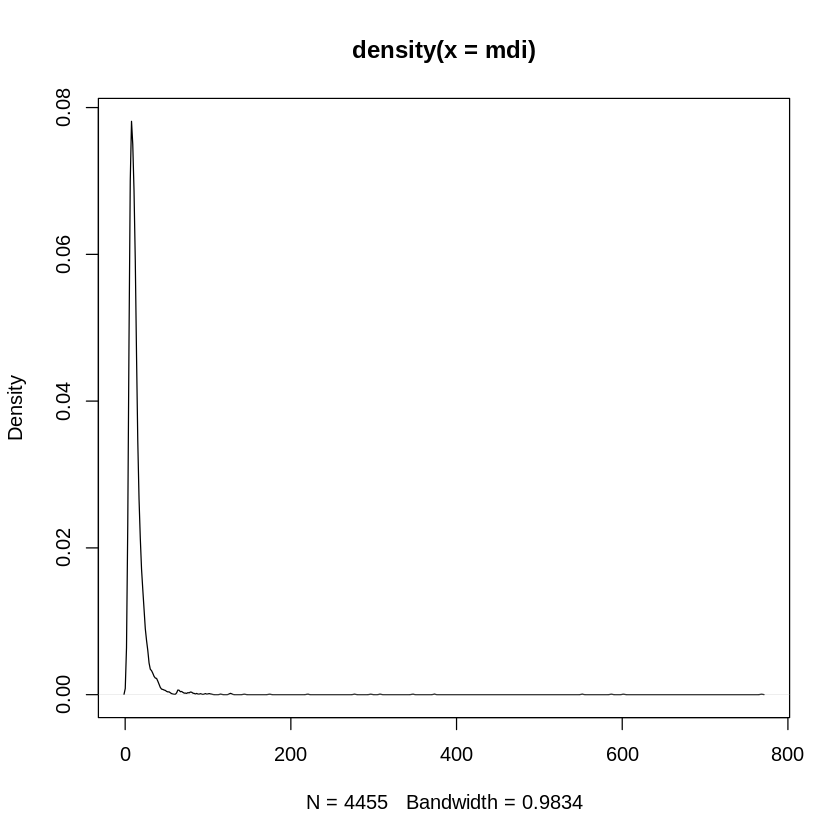

In [31]:

DataMahalanobis <- DataMice

mdi = mahalanobis(DataMahalanobis,center=apply(DataMahalanobis,2,mean),cov=var(DataMahalanobis))
plot(density(mdi))                                                              #Grafico la distancia de MAHALANOBIS
cutoff <- qchisq(p = 0.99 , ncol(df_imp))                                       #sacamos todos los outliers multidimensionales con un error del 1%
DataMahalanobis[mdi>cutoff,]                                                    #se quiere sacar los clientes con datos outliers con limite de probabilidad mdi > al cutoff


#ME DELIMIT�  71CLIENTES


In [32]:

#se imprime clientes outliers  "REVI?AR"
print(Data[c(31,85,127,144,157,242,271,296,314,344,397,400,403,449,508,569,636,772,696,739,767,809,869,896,1041,1057),])#para saber que tipo de cliente es


     Dictamen Antiguedad.Trabajo Vivienda Plazo Edad Estado.civil Registros
31          1                  4        2    48   29            2         1
85          1                 10        2    60   38            2         1
127         2                  0        5    60   23            1         1
144         1                 40        2    36   58            2         1
157         1                  8        1    36   36            2         1
242         2                 10        1    60   43            2         1
271         1                  3        2    60   30            4         1
296         2                  8        2    60   30            2         1
314         1                  6        2    36   49            2         1
344         1                  2        2    30   26            2         1
397         1                 10        2    48   37            5         1
400         2                  4        1    60   42            5         2
403         

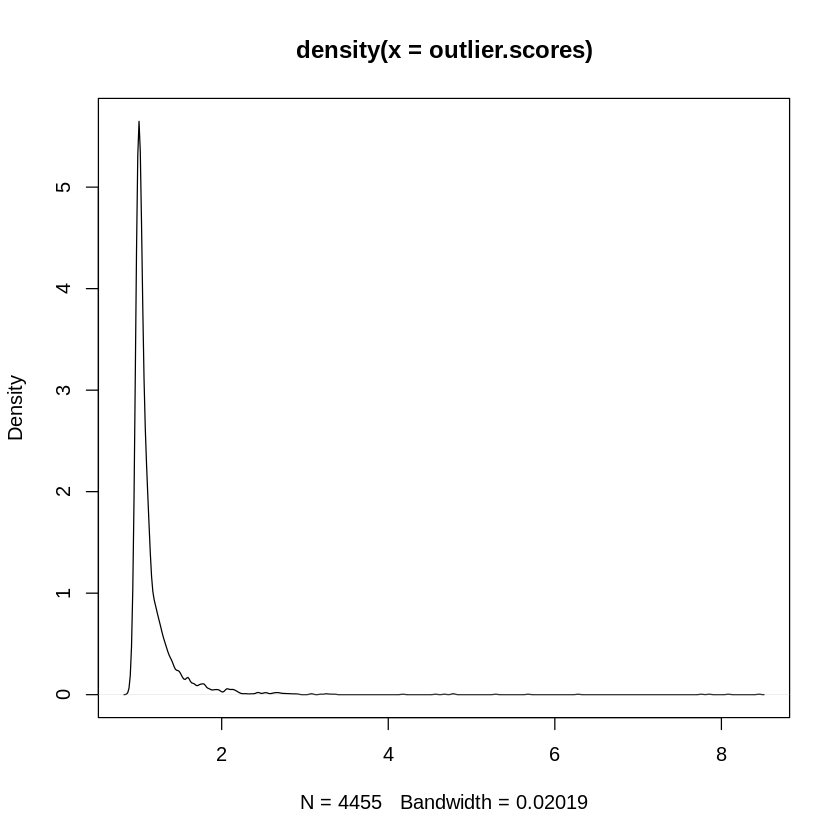

In [33]:

bk <- DataMahalanobis                                                            #Hacemos un Backup

#OTRA FORMA DE DETECTAR OUTLIERS
outlier.scores <- lofactor(DataMahalanobis, k=5)
plot(density(outlier.scores))

In [34]:

#Para detectar los outliers m�s importantes
outliers <- order(outlier.scores, decreasing=T)[1:100]                          #detecci�n de outliers
sort(outlier.scores,decreasing=T)[1:100]                                        #orden de los outliers
print(DataMahalanobis[outliers,2:3])                                            #estos son los outliers que identific�


[1] 8.450814 8.084507 7.853114 7.758637 6.279295 5.679845 5.288865 4.782636
  [9] 4.778547 4.674375 4.567795 4.175777 3.357019 3.306068 3.261930 3.247371
 [17] 3.190683 3.079900 3.074587 2.912870 2.884683 2.853717 2.826102 2.803093
 [25] 2.780538 2.760468 2.743869 2.722179 2.700109 2.694272 2.690095 2.664442
 [33] 2.661469 2.656194 2.639608 2.630286 2.611266 2.607149 2.567099 2.546706
 [41] 2.536837 2.536572 2.514915 2.507835 2.504147 2.468179 2.445909 2.443284
 [49] 2.430176 2.429860 2.429235 2.400086 2.365171 2.348339 2.305005 2.286770
 [57] 2.267296 2.228896 2.218087 2.208710 2.190509 2.186299 2.177299 2.177147
 [65] 2.170806 2.163250 2.161089 2.158959 2.146437 2.143854 2.138007 2.132402
 [73] 2.131633 2.128886 2.127078 2.123083 2.122089 2.111903 2.108477 2.104746
 [81] 2.099703 2.090044 2.084662 2.079751 2.074209 2.072783 2.071545 2.070152
 [89] 2.069381 2.059174 2.057482 2.054655 2.054351 2.051936 2.051908 2.047573
 [97] 2.043404 2.018072 2.013705 1.993459

     Antiguedad.Trabajo Vivienda
3963                  2        1
1392                  2        2
878                   4        2
1275                  8        5
2705                  6        1
126                  12        2
1802                  0        5
143                  15        2
1735                 10        1
2403                  0        2
1972                  0        5
1807                  0        1
1313                  2        1
807                   2        3
3929                  0        5
1135                  2        5
893                   5        2
608                   9        2
60                   14        2
2865                  6        4
2704                 13        3
921                  10        2
2618                 18        2
394                   1        2
284                  10        2
368                   7        1
3232                 10        5
166                   6        2
3049                 12        2
2563      

In [35]:


###########################################################################################################################
#                                                          Limpieza de los Outliers:
###########################################################################################################################

View(DataMahalanobis)                                                           #Se revisa los datos

cleanOutliers <- DataMahalanobis

Dictamen Antiguedad.Trabajo Vivienda Plazo Edad Estado.civil Registros
1    1         9                 1        60    30   2            1        
2    1        17                 1        60    58   3            1        
3    2        10                 2        36    46   2            2        
4    1         0                 1        60    24   1            1        
5    1         0                 1        36    26   1            1        
6    1         1                 2        60    36   2            1        
7    1        29                 2        60    44   2            1        
8    1         9                 5        12    27   1            1        
9    1         0                 2        60    32   2            1        
10   2         0                 5        48    41   2            1        
11   1         6                 2        48    34   2            1        
12   1         7                 2        36    29   2            1        
13   1         8                 2        60    30   2            1        
14   1        19                 3        36    37   2            1        
15   2         0                 6        18    21   1            2        
16   1         0                 2        24    68   2            1        
17   1        15                 3        24    52   1            1        
18   1        33                 1        24    68   2            1        
19   2         0                 4        48    36   2            1        
20   1         1                 5        60    31   1            1        
21   2         2                 1        60    25   1            1        
22   1         5                 2        60    22   1            1        
23   2         1                 2        60    45   2            1        
24   1        27                 1        60    41   2            1        
25   1        26                 2        60    51   2            1        
26   1        12                 2        36    54   2            1        
27   1        19                 2        60    43   1            1        
28   1        15                 2        36    43   2            1        
29   2         3                 2        24    23   2            1        
30   2         0                 6        48    37   1            1        
⋮    ⋮        ⋮                  ⋮        ⋮     ⋮    ⋮            ⋮        
4426 1         6                 2        60    43   2            2        
4427 1         1                 2        36    26   2            1        
4428 1        34                 2        60    50   2            2        
4429 1        20                 2        48    47   2            1        
4430 1         6                 2        60    26   2            1        
4431 2         4                 3        36    38   2            1        
4432 1         3                 2        24    64   2            1        
4433 2         0                 1        60    36   2            2        
4434 1         8                 2        48    40   1            1        
4435 2         8                 2        36    51   3            1        
4436 1         6                 5        60    31   2            1        
4437 2         3                 1        48    26   2            2        
4438 2         1                 5        48    18   1            1        
4439 1         4                 4        18    37   2            1        
4440 2         8                 2        60    37   2            1        
4441 1        20                 2        60    38   2            1        
4442 1         3                 2        42    41   2            1        
4443 1        10                 2        60    33   1            1        
4444 2         2                 2        60    31   4            1        
4445 1         1                 2        60    31   3            2        
4446 2         6                 5        60    22   

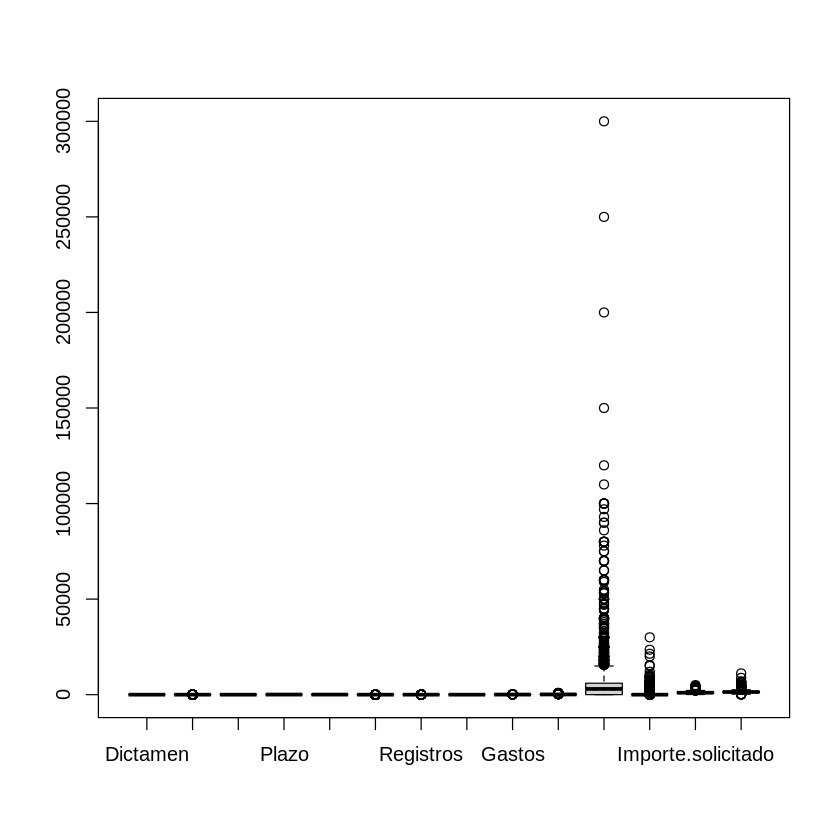

In [36]:

#-------------------------------------------------------------------------------------------------------------------------
# se revisa el total de Outliers en el conjunto de datos
#-------------------------------------------------------------------------------------------------------------------------

TotalDataOutliers <- cleanOutliers
#TotalDataOutliers <- cleanOutliers[c("Antiguedad.Trabajo","Edad","Gastos", "Importe.solicitado","Ingresos","Patrimonio","Cargas.patrimoniales","Plazo","Precio.del.bien.financiado")]
TotalDataOutliers$Cargas.patrimoniales=as.numeric(TotalDataOutliers$Cargas.patrimoniales)

#ANTES:
boxplot(cleanOutliers, cex.axi=0.5)                                             #Diagrama de Cajas general
boxplot(cleanOutliers)


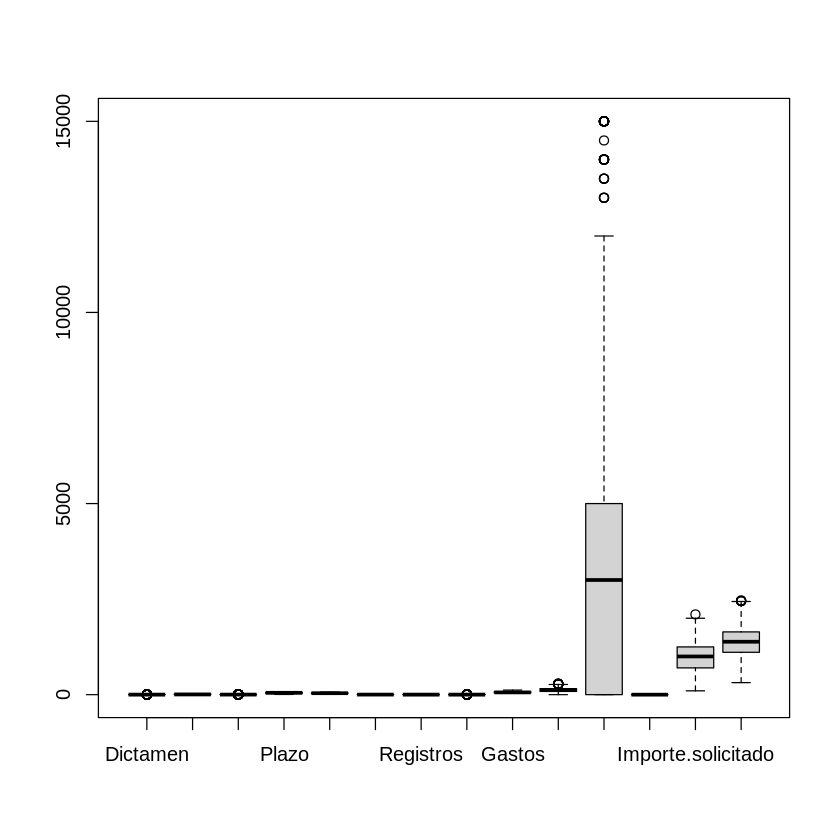

In [37]:

for(i in 1:ncol(TotalDataOutliers)){                                            #Limpieza de Outliers Variables Totales
  out <- boxplot(TotalDataOutliers[,i], plot=FALSE)$out
  out
  if(length(out) > 0){
    TotalDataOutliers <- TotalDataOutliers[-which(TotalDataOutliers[,i]%in%out),]
  }
}
#AHORA:
boxplot(TotalDataOutliers, cex.axi=0.5)                                  #Diagrama de Cajas general
boxplot(TotalDataOutliers)


In [38]:

cleanOutliers <- TotalDataOutliers
View(TotalDataOutliers)

Dictamen Antiguedad.Trabajo Vivienda Plazo Edad Estado.civil Registros
1    1         9                 1        60    30   2            1        
6    1         1                 2        60    36   2            1        
9    1         0                 2        60    32   2            1        
10   2         0                 5        48    41   2            1        
11   1         6                 2        48    34   2            1        
12   1         7                 2        36    29   2            1        
16   1         0                 2        24    68   2            1        
19   2         0                 4        48    36   2            1        
24   1        27                 1        60    41   2            1        
25   1        26                 2        60    51   2            1        
26   1        12                 2        36    54   2            1        
29   2         3                 2        24    23   2            1        
33   1        14                 3        24    51   2            1        
34   1        10                 2        36    39   2            1        
37   1        10                 2        24    56   2            1        
38   1         7                 2        48    32   2            1        
39   2         1                 1        54    36   2            1        
42   1        24                 2        60    42   2            1        
45   2         2                 2        60    43   2            1        
48   1        15                 2        36    47   2            1        
50   1        25                 2        36    52   2            1        
52   1         5                 2        60    31   2            1        
55   1         3                 5        12    37   2            1        
59   1         6                 2        24    63   2            1        
61   1         3                 1        60    28   2            1        
62   1         8                 1        48    31   2            1        
64   1        22                 2        24    40   2            1        
65   1         2                 2        36    35   2            1        
66   1        15                 3        60    43   2            1        
67   1        10                 2        18    34   2            1        
⋮    ⋮        ⋮                  ⋮        ⋮     ⋮    ⋮            ⋮        
4364 1        24                 2        36    61   2            1        
4366 1         5                 1        36    32   2            1        
4368 1         4                 1        60    25   2            1        
4369 2         8                 5        60    38   2            1        
4371 1         3                 6        48    39   2            1        
4372 1        12                 2        60    45   2            1        
4373 1        12                 2        36    43   2            1        
4378 1        18                 2        36    38   2            1        
4383 1        23                 2        36    45   2            1        
4384 1        12                 6        36    33   2            1        
4389 1         3                 2        48    26   2            1        
4398 1        25                 3        60    49   2            1        
4405 2         3                 1        60    24   2            1        
4406 1         9                 6        60    25   2            1        
4410 1        16                 2        48    55   2            1        
4416 1         5                 1        60    50   2            1        
4418 1         0                 2        48    65   2            1        
4420 1         0                 3        60    35   2            1        
4423 1        12                 6        60    48   2            1        
4425 1         5                 2        60    31   2            1        
4429 1        20                 2        48    47   

'data.frame':	1735 obs. of  14 variables:
 $ Dictamen                  : num  1 1 1 2 1 1 1 2 1 1 ...
 $ Antiguedad.Trabajo        : int  9 1 0 0 6 7 0 0 27 26 ...
 $ Vivienda                  : num  1 2 2 5 2 2 2 4 1 2 ...
 $ Plazo                     : int  60 60 60 48 48 36 24 48 60 60 ...
 $ Edad                      : int  30 36 32 41 34 29 68 36 41 51 ...
 $ Estado.civil              : num  2 2 2 2 2 2 2 2 2 2 ...
 $ Registros                 : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Tipo.trabajo              : num  3 1 3 2 3 1 1 2 1 1 ...
 $ Gastos                    : int  73 75 90 90 60 60 75 45 74 45 ...
 $ Ingresos                  : int  129 214 107 80 125 121 131 130 140 143 ...
 $ Patrimonio                : int  0 3500 15000 0 4000 3000 4162 750 0 3500 ...
 $ Cargas.patrimoniales      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Importe.solicitado        : int  800 650 1200 1200 1150 650 900 1100 950 1350 ...
 $ Precio.del.bien.financiado: int  846 1645 1957 1468 1577 915 1186 1511 1497 13

    Dictamen     Antiguedad.Trabajo    Vivienda         Plazo     
 Min.   :1.000   Min.   : 0.000     Min.   :1.000   Min.   : 6.0  
 1st Qu.:1.000   1st Qu.: 2.000     1st Qu.:1.000   1st Qu.:36.0  
 Median :1.000   Median : 6.000     Median :2.000   Median :48.0  
 Mean   :1.211   Mean   : 8.293     Mean   :2.356   Mean   :46.8  
 3rd Qu.:1.000   3rd Qu.:14.000     3rd Qu.:2.000   3rd Qu.:60.0  
 Max.   :2.000   Max.   :27.000     Max.   :6.000   Max.   :60.0  
      Edad        Estado.civil   Registros  Tipo.trabajo       Gastos      
 Min.   :20.00   Min.   :2     Min.   :1   Min.   :1.000   Min.   : 35.00  
 1st Qu.:31.00   1st Qu.:2     1st Qu.:1   1st Qu.:1.000   1st Qu.: 45.00  
 Median :38.00   Median :2     Median :1   Median :1.000   Median : 60.00  
 Mean   :39.07   Mean   :2     Mean   :1   Mean   :1.629   Mean   : 60.87  
 3rd Qu.:47.00   3rd Qu.:2     3rd Qu.:1   3rd Qu.:2.000   3rd Qu.: 75.00  
 Max.   :68.00   Max.   :2     Max.   :1   Max.   :4.000   Max.   :120.00  

Dictamen Antiguedad.Trabajo Vivienda Plazo Edad Estado.civil Registros
1    1         9                 1        60    30   2            1        
6    1         1                 2        60    36   2            1        
9    1         0                 2        60    32   2            1        
10   2         0                 5        48    41   2            1        
11   1         6                 2        48    34   2            1        
12   1         7                 2        36    29   2            1        
16   1         0                 2        24    68   2            1        
19   2         0                 4        48    36   2            1        
24   1        27                 1        60    41   2            1        
25   1        26                 2        60    51   2            1        
26   1        12                 2        36    54   2            1        
29   2         3                 2        24    23   2            1        
33   1        14                 3        24    51   2            1        
34   1        10                 2        36    39   2            1        
37   1        10                 2        24    56   2            1        
38   1         7                 2        48    32   2            1        
39   2         1                 1        54    36   2            1        
42   1        24                 2        60    42   2            1        
45   2         2                 2        60    43   2            1        
48   1        15                 2        36    47   2            1        
50   1        25                 2        36    52   2            1        
52   1         5                 2        60    31   2            1        
55   1         3                 5        12    37   2            1        
59   1         6                 2        24    63   2            1        
61   1         3                 1        60    28   2            1        
62   1         8                 1        48    31   2            1        
64   1        22                 2        24    40   2            1        
65   1         2                 2        36    35   2            1        
66   1        15                 3        60    43   2            1        
67   1        10                 2        18    34   2            1        
⋮    ⋮        ⋮                  ⋮        ⋮     ⋮    ⋮            ⋮        
4364 1        24                 2        36    61   2            1        
4366 1         5                 1        36    32   2            1        
4368 1         4                 1        60    25   2            1        
4369 2         8                 5        60    38   2            1        
4371 1         3                 6        48    39   2            1        
4372 1        12                 2        60    45   2            1        
4373 1        12                 2        36    43   2            1        
4378 1        18                 2        36    38   2            1        
4383 1        23                 2        36    45   2            1        
4384 1        12                 6        36    33   2            1        
4389 1         3                 2        48    26   2            1        
4398 1        25                 3        60    49   2            1        
4405 2         3                 1        60    24   2            1        
4406 1         9                 6        60    25   2            1        
4410 1        16                 2        48    55   2            1        
4416 1         5                 1        60    50   2            1        
4418 1         0                 2        48    65   2            1        
4420 1         0                 3        60    35   2            1        
4423 1        12                 6        60    48   2            1        
4425 1         5                 2        60    31   2            1        
4429 1        20                 2        48    47   

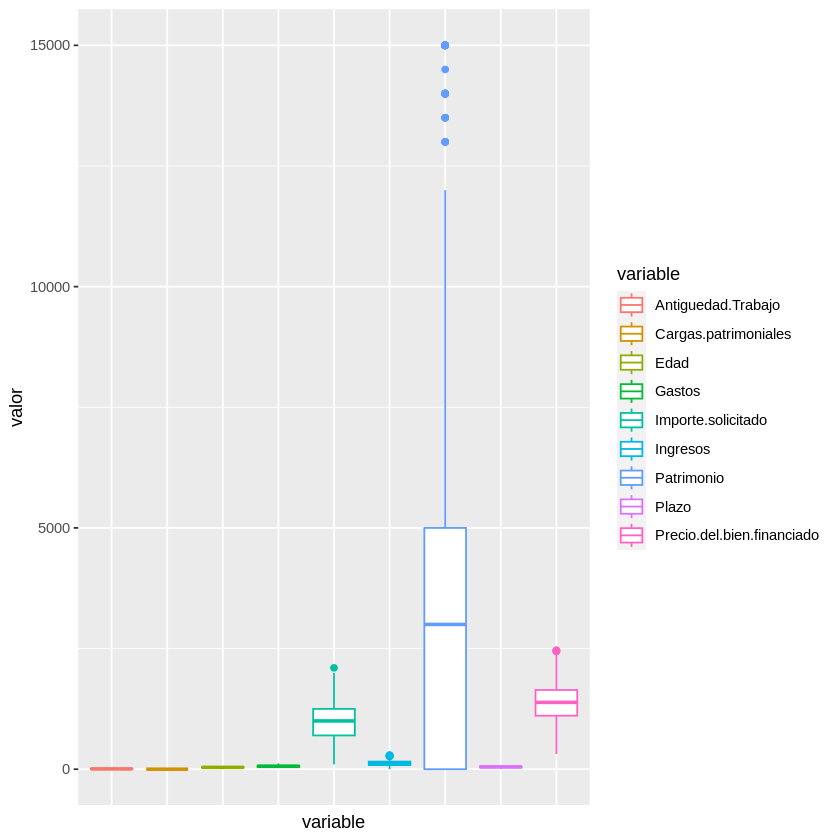

In [39]:

#NOTA: AUNQUE SE DISMINUYE LOS OUTLIERS, EL PROBLEMA QUE SE PRESENTA ES, SE DESCARTAN MUCHOS DATOS DE 4455 CLIENTES
#PASAMOS A 3023 CLIENTES

#---------------------------------------------------------------------------------------------------------------------------
str(cleanOutliers)                                                              #se revisa la estructura de los datos
summary(cleanOutliers)
View(cleanOutliers)

#Revisamos gr�ficamente BoxPlot
cleanOutliers %>% pivot_longer(-c(Dictamen, Vivienda, Estado.civil, Registros, Tipo.trabajo), names_to = "variable", values_to = "valor") %>%
  ggplot(aes(x = variable, y=valor, color=variable)) +
  geom_boxplot() +
  #theme(axis.text.x = element_text(angle = 90))
  theme(axis.text.x=element_blank(), #remove x axis labels
        axis.ticks.x=element_blank(), #remove x axis ticks
        #axis.text.y=element_blank(),  #remove y axis labels
        #axis.ticks.y=element_blank()  #remove y axis ticks
  )

    Dictamen     Antiguedad.Trabajo    Vivienda         Plazo     
 Min.   :1.000   Min.   : 0.000     Min.   :1.000   Min.   : 6.0  
 1st Qu.:1.000   1st Qu.: 2.000     1st Qu.:1.000   1st Qu.:36.0  
 Median :1.000   Median : 6.000     Median :2.000   Median :48.0  
 Mean   :1.211   Mean   : 8.293     Mean   :2.356   Mean   :46.8  
 3rd Qu.:1.000   3rd Qu.:14.000     3rd Qu.:2.000   3rd Qu.:60.0  
 Max.   :2.000   Max.   :27.000     Max.   :6.000   Max.   :60.0  
      Edad        Estado.civil   Registros  Tipo.trabajo       Gastos      
 Min.   :20.00   Min.   :2     Min.   :1   Min.   :1.000   Min.   : 35.00  
 1st Qu.:31.00   1st Qu.:2     1st Qu.:1   1st Qu.:1.000   1st Qu.: 45.00  
 Median :38.00   Median :2     Median :1   Median :1.000   Median : 60.00  
 Mean   :39.07   Mean   :2     Mean   :1   Mean   :1.629   Mean   : 60.87  
 3rd Qu.:47.00   3rd Qu.:2     3rd Qu.:1   3rd Qu.:2.000   3rd Qu.: 75.00  
 Max.   :68.00   Max.   :2     Max.   :1   Max.   :4.000   Max.   :120.00  

Antiguedad.Trabajo Edad  Gastos Importe.solicitado
Antiguedad.Trabajo         1.00                0.35  0.02   0.00             
Edad                       0.35                1.00  0.04  -0.07             
Gastos                     0.02                0.04  1.00   0.03             
Importe.solicitado         0.00               -0.07  0.03   1.00             
Ingresos                   0.17                0.02  0.17   0.11             
Patrimonio                 0.15                0.32 -0.07   0.00             
Plazo                      0.00               -0.06 -0.02   0.57             
Precio.del.bien.financiado 0.07               -0.07 -0.03   0.65             
                           Ingresos Patrimonio Plazo Precio.del.bien.financiado
Antiguedad.Trabajo         0.17      0.15       0.00  0.07                     
Edad                       0.02      0.32      -0.06 -0.07                     
Gastos                     0.17     -0.07      -0.02 -0.03                     
Importe.solicitado         0.11      0.00       0.57  0.65                     
Ingresos                   1.00      0.04       0.00  0.12                     
Patrimonio                 0.04      1.00      -0.09  0.07                     
Plazo                      0.00     -0.09       1.00  0.23                     
Precio.del.bien.financiado 0.12      0.07       0.23  1.00

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded

Warning message in cor(x = cleanOutliers[c("Antiguedad.Trabajo", "Cargas.patrimoniales", :
“the standard deviation is zero”


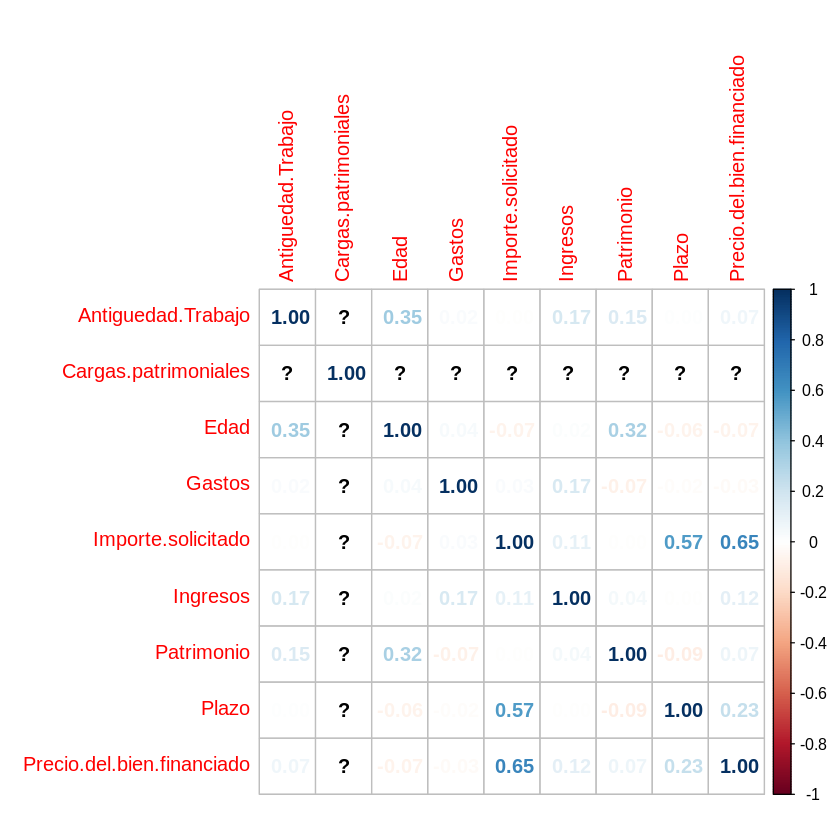

In [43]:

##############################################################################################################################
#1.-                                                  <<CORRELACI�N DE LOS DATOS>>
##############################################################################################################################

summary(cleanOutliers)


#Matriz de correlaci�n
round(cor(x = cleanOutliers[c("Antiguedad.Trabajo","Edad","Gastos", "Importe.solicitado","Ingresos","Patrimonio","Plazo","Precio.del.bien.financiado")], method = "pearson"),2)

#Heat maps de la correlacion
install.packages("corrplot")

library(corrplot)
corrplot(corr = cor(x = cleanOutliers[c("Antiguedad.Trabajo","Cargas.patrimoniales","Edad","Gastos", "Importe.solicitado","Ingresos","Patrimonio","Plazo","Precio.del.bien.financiado")], method = "pearson"), method = "number")

Call:
princomp(x = cleanOutliers)

Standard deviations:
      Comp.1       Comp.2       Comp.3       Comp.4       Comp.5       Comp.6 
3.625732e+03 5.224784e+02 2.382152e+02 5.861271e+01 1.681569e+01 1.144050e+01 
      Comp.7       Comp.8       Comp.9      Comp.10      Comp.11      Comp.12 
1.016680e+01 6.270576e+00 1.464133e+00 8.332772e-01 3.605515e-01 2.181242e-15 
     Comp.13      Comp.14 
0.000000e+00 0.000000e+00 

 14  variables and  1735 observations.

Importance of components:
                             Comp.1       Comp.2       Comp.3       Comp.4
Standard deviation     3625.7320144 522.47839926 2.382152e+02 5.861271e+01
Proportion of Variance    0.9752423   0.02025153 4.209786e-03 2.548618e-04
Cumulative Proportion     0.9752423   0.99549386 9.997036e-01 9.999585e-01
                             Comp.5       Comp.6       Comp.7       Comp.8
Standard deviation     1.681569e+01 1.144050e+01 1.016680e+01 6.270576e+00
Proportion of Variance 2.097734e-05 9.709827e-06 7.668137e-06 2.916997e-06
Cumulative Proportion  9.999795e-01 9.999892e-01 9.999969e-01 9.999998e-01
                             Comp.9      Comp.10      Comp.11      Comp.12
Standard deviation     1.464133e+00 8.332772e-01 3.605515e-01 2.181242e-15
Proportion of Variance 1.590312e-07 5.151102e-08 9.643967e-09 3.529628e-37
Cumulative Proportion  9.999999e-01 1.000000e+00 1.000000e+00 1.000000e+00
                       Comp.13 Comp.14
Standard deviation           0     

Comp.1        Comp.2        Comp.3       
Dictamen                    2.215055e-05  4.318698e-05  3.237438e-04
Antiguedad.Trabajo         -3.051565e-04  4.525589e-04 -1.938151e-03
Vivienda                    3.828693e-05  1.666982e-04 -1.421676e-04
Plazo                       3.701552e-04  1.170250e-02  2.505601e-02
Edad                       -9.162626e-04 -1.735203e-03  1.232105e-03
Estado.civil                1.292470e-26 -5.421011e-20 -8.673617e-19
Registros                   0.000000e+00  0.000000e+00  0.000000e+00
Tipo.trabajo               -4.296429e-05 -1.020700e-04  1.251497e-04
Gastos                      3.355026e-04 -1.753069e-06  4.100727e-03
Ingresos                   -7.209229e-04  1.399181e-02 -1.450467e-03
Patrimonio                 -9.999637e-01 -6.250485e-03  5.647766e-03
Cargas.patrimoniales        0.000000e+00  0.000000e+00  0.000000e+00
Importe.solicitado          6.193200e-05  6.643053e-01  7.469391e-01
Precio.del.bien.financiado -8.414106e-03  7.472105e-01 -6.643779e-01

Comp.1      Comp.2     Comp.3      Comp.4       Comp.5     Comp.6    
1    3296.7881 -495.20441  199.069119 -18.24279843  8.0052515 -13.462710
6    -209.8807  -18.53011 -424.135098 -92.99922008  8.9248917 -25.197335
9  -11711.9689  506.59601 -155.441254  28.09383781 33.1770668 -16.174158
10   3291.6088  234.43419   84.472415  40.01676073 30.3540649   3.772926
11   -709.2045  258.30683   -2.908986  -0.03168986 -0.8287715   1.808574
12    296.3012 -562.43571   57.488683  -8.36272922 -1.9017732   6.056520
   Comp.7    Comp.8     Comp.9      Comp.10    Comp.11      Comp.12      
1   6.928660 -3.9760915 -1.20503652  1.9110168 -0.367402016  1.848992e-29
6   8.295184  9.1225984  0.07937294 -0.2487426 -0.001193184 -2.634016e-30
9  22.469891  4.9099228  0.43988847  0.8204716 -0.235043033  3.554352e-31
10 -1.001079  7.4201355  3.01754342 -0.1795448  0.412616532 -2.140500e-29
11  5.747254  0.4208615 -0.41958318  1.3673963 -0.301532820  1.068368e-29
12 10.075169 -3.4963954 -0.46436493 -0.4645305 -0.167658871  3.500342e-31
   Comp.13       Comp.14      
1   8.476717e-16 -1.109418e-13
6   4.237096e-15  1.340500e-14
9   4.240260e-15 -8.245094e-15
10  5.033927e-15  1.075032e-13
11 -1.892487e-16 -6.070612e-14
12 -1.051828e-15  4.186872e-15

[1] 1735   14

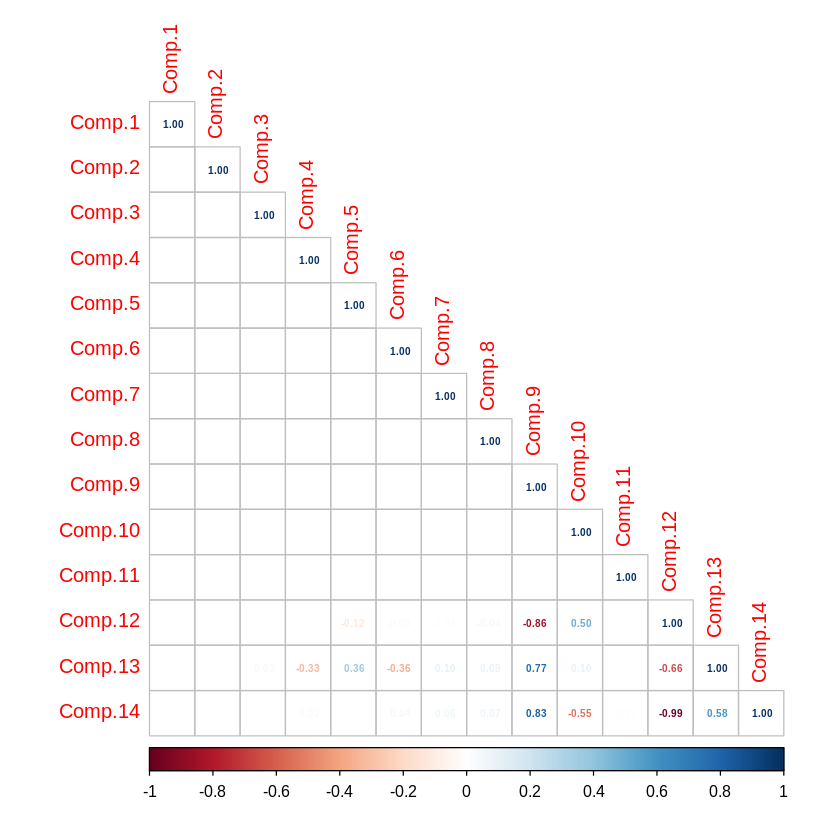

In [44]:
##############################################################################################################################
#                                                        COMPONENTES PRINCIPALES:
##############################################################################################################################

#corrplot(corr = cor(x = cleanOutliers[c("Antiguedad.Trabajo","Cargas.patrimoniales","Edad","Gastos", "Importe.solicitado","Ingresos","Patrimonio","Plazo","Precio.del.bien.financiado")], method ="number",number.cex = 0.75)
princomp(cleanOutliers)
componentes <- princomp(cleanOutliers)
summary(componentes)
#CONCLUSIONES DE summary: con 2 componentes principales puedo explciar mi modelo.

#PASAMOS DE HIPERPLANO A LAS COMPONENTES QUE DESEE:
componentes$loadings[,1:3]
head(componentes$scores)                                                        #COMBINACI�N LINEAL DE LOS PLANOS

bk2 <- cleanOutliers                                                            #Hacemos un Backup # 2


#cleanOutliers1 <- cleanOutliers[c("Antiguedad.Trabajo","Edad","Gastos", "Importe.solicitado","Ingresos","Patrimonio","Cargas.patrimoniales","Plazo","Precio.del.bien.financiado")]

#AN�LISIS DE COMPONENTES QUE REDUCE EL ESPACIO DIMENSIONAL:
dim(componentes$scores)
corrplot(cor(componentes$scores), method = "number", type = "lower", number.cex = 0.5)


ERROR: ignored

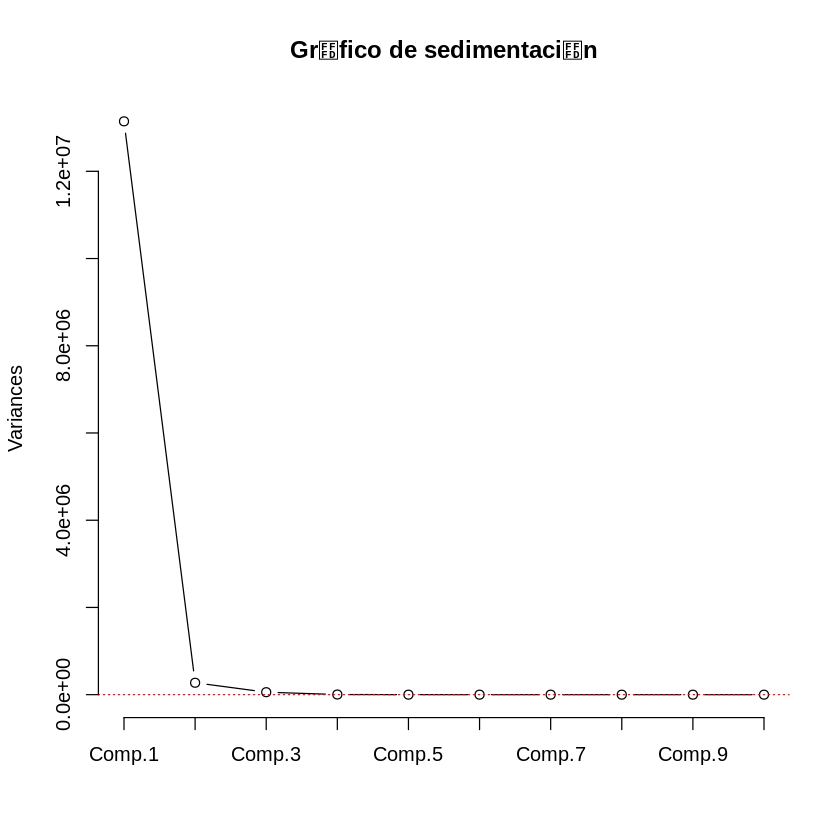

In [45]:

############################################################################################################################
#                                             <<GR�FICO DE SEDIMENTACI�N:>>
############################################################################################################################
plot(componentes, type="lines", main = "Gr�fico de sedimentaci�n")
abline(h=1, lty=3, col="red")
# Por mucho me puedo quedar con 2 componentes por el cambio de tendencia, pasamos de9 variables a 2 variables

#OTRA FORMA M�S R�PIDA DE SABER LAS DIMENSIONES:
library(factoextra)
get_pca_var(componentes)
round(factoextra::get_pca_var(componentes)$cor, 4)
cor_compvar <- round(cor(cleanOutliers1, componentes$scores),4)
cor_compvar_retenidos <- cor_compvar[,1:9]
cor_compvar_retenidos
round(factoextra::get_pca_var(componentes)$cos2[,1:9], 4)

#gr�fico dimensiones
#_____________________________________________________________________________
corrplot(factoextra::get_pca_var(componentes)$cos2[,1:9], is.corr =F)


#GR�FICO DE VARIABLES EN EL PLANO 1-2
#_____________________________________________________________________________
factoextra::fviz_pca_var(componentes, col.var ="cos2",
                         gradient.cols =c("green","orange","red"),
                         repel = TRUE,
                         title = "cos2 de las variables en el plano 1-9")
# A NIVEL DE 2 DIMENSIONES LAS VARIABLES QUE M�S IMPORTAN SON ????

#Gr�fico de variables (OTRO TIPO DE GR�FICO)
#_______________________________________________________________________________
factoextra::fviz_cos2(componentes, choice ="var",
                      axes = 1:9,
                      title = "cos2 de las variables en el plano 1 a 9")
#tener encuenta la altura de cada una de las variables



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



$hopkins_stat
[1] 0.80032

$plot


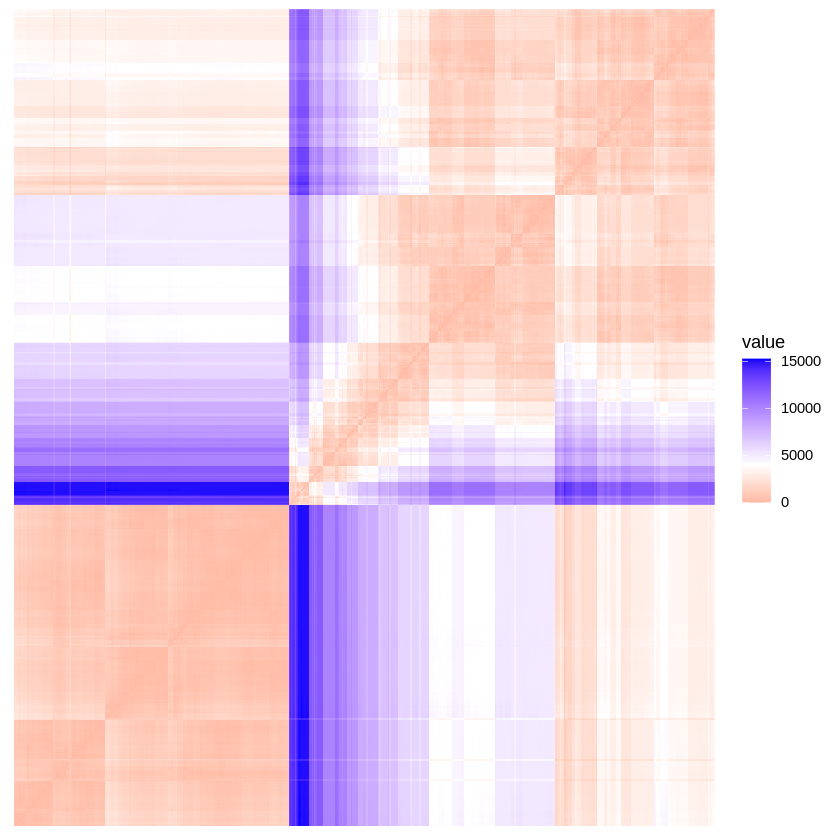

In [49]:

#############################################################################################################################
#                         <<PARA SABER SI NUESTRO CONJUNTO DE DATOS ES CLUSTERISABLE, SE HACE: >>
#############################################################################################################################

#cambiamos el nombre del dataset para que sea m�s facil identificarlo:
bk3 <- cleanOutliers                                                            #tercer backup de los datos
data_cluster <- cleanOutliers                                                   #cambio de nombre al conjunto de datos
install.packages("factoextra")
library(factoextra)                                                             #librer�a que me sirve para la clusterizaci�n.
#sirve para entender la tendencia de clusterizaci�n en mi conjunto de datos.

#Aplicamos la estad�stica de Hopkins:
get_clust_tendency(data_cluster,n=1000, graph = TRUE, gradient = list(low = "red",
                                                                      mid = "white", high ="blue"), seed = 123)
#NOTA: La estad�sitica de Hopkins se parece al coeficiente de correlaci�n pero esta oxila entre 0 y 1 , mientras el de correlaci�n oxila entre -1 y 1.
#donde n = n�mero de observaciones, graph = TRUE grafica la matriz de distancias
#gradiente nos dicen cuales observaciones tienen menor distancias de las que tienen mayor distancia
#En la Funci�n get_clsut_tendency , si el valor diera 0,2 o similar, no se tendr�a encuenta los datos para hacer closterin, pero
#como el valor es 0.80032 el set de datos se le ar� un clustering.
#Si s�lo se escoge las variables que representan al modelo "Patrimonio" y "Cargas.Patrimoniales" el valor es 0.9344307
#Las sombras en la gr�fica nos muestra posibles relaciones en los datos.



In [50]:
#DENTRO DE LOS PAQUETES DE R manejamos variables num�ricas para la clusterizaci�n. Por tal motivo, se
#descartan las variables no num�ricas y la variable de respuesta "Dictamen"

data_cluster <- cleanOutliers[c("Patrimonio","Cargas.patrimoniales")]          #cleanOutliers es una variable con s�lo las columna num�ricas del conjunto de datos

#Clustering con m�todo Ward. D con distancia euclideana
#Generaci�n de la matriz de distancia.
distancia <- dist(data_cluster,"euclidean")
distancia




         1     6     9    10    11    12    16    19    24    25    26    29
6     3500                                                                  
9    15000 11500                                                            
10       0  3500 15000                                                      
11    4000   500 11000  4000                                                
12    3000   500 12000  3000  1000                                          
16    4162   662 10838  4162   162  1162                                    
19     750  2750 14250   750  3250  2250  3412                              
24       0  3500 15000     0  4000  3000  4162   750                        
25    3500     0 11500  3500   500   500   662  2750  3500                  
26    4000   500 11000  4000     0  1000   162  3250  4000   500            
29    5000  1500 10000  5000  1000  2000   838  4250  5000  1500  1000      
33    1000  2500 14000  1000  3000  2000  3162   250  1000  2500  3000  4000

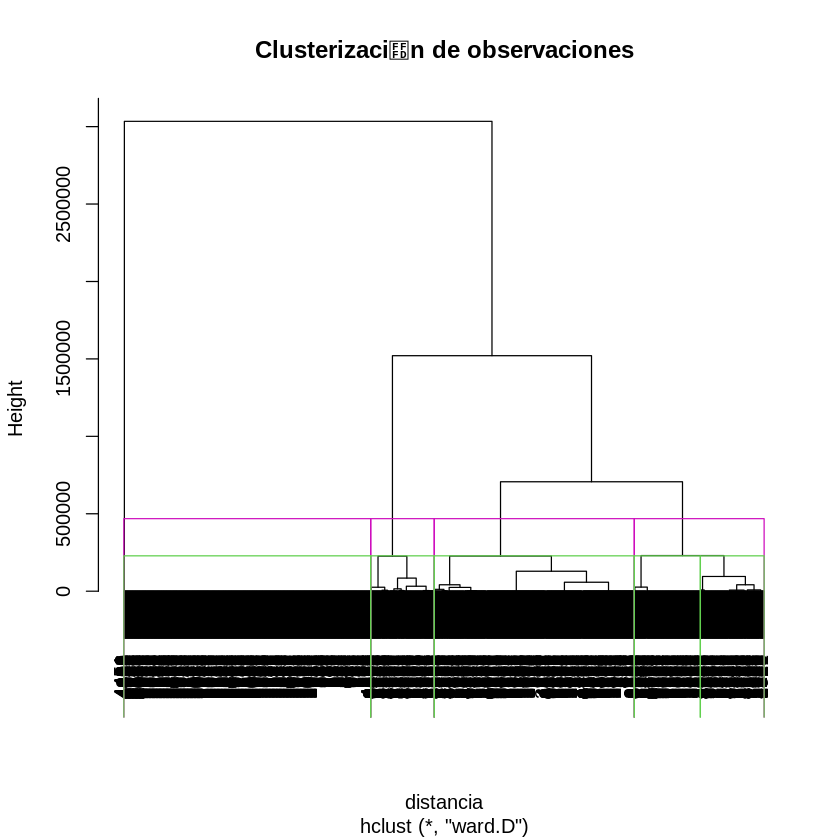

In [51]:
#El resultado de las distancias no es claro por lo que vamos a generar un dendograma:
#------------------------------------------------------------------------------------
#Generaci�n del Dendograma: (Ward. D es uno de los m�todos de clusterizaci�n)
fit <- hclust(distancia,"ward.D")                                               #Devuelve el conjunto de datos agrupados de cierta manera.
plot(fit, main="Clusterizaci�n de observaciones")
#Tenemos un �rbol donde lo cortamos y tenemos 4 grupos de diferenciaci�n. si cortamos m�s abajo
#el arbol encontramos grupos con alturas muy parecidas o si miramos el �ltimo nivel hay mucha dispersi�n entre los grupos.
rect.hclust(fit, k=4, border = 6)
rect.hclust(fit, k=5, border = 3)

In [54]:

#Para mirar num�ricamente que la divisi�n de cluster sea la correcta por la parte num�rica hacemos:
#(utilizamos la libreria NbClust)
install.packages("NbClust")
library(NbClust)
indices <- c("kl","ch","hartigan","cindex","db","silhouette","ball","dunn","sdindex")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [55]:

particiones <- vector()
for(i in 1:length(indices)){
  print(indices[i])
  sel_k <- NbClust(data_cluster,diss=distancia,distance=NULL,min.nc=2,max.nc=5,method="ward.D",index=indices[i])
  particiones[i] <- max(sel_k$Best.partition)
}
#En el c�digo anterior colocamos como m�nimo de cluster 2 y m�ximo 5 con el m�todo Ward.D y los indices anteriores se�alizados

names(particiones) <- indices
particiones
# en este caso la mayor�a de los �ndices detect� que el mejor n�mero de grupos de datos son 3.
#Lo que se quiere maximizar es la suma de los cuadrados extracluster entre un grupo y otro como tambi�n
#las alturas m�s pronunciadas.S�lo hay un �ndice "cindex", que corrobora lo que se hab�a mostrado en el dendograma con 5 grupos.


[1] "kl"
[1] "ch"
[1] "hartigan"
[1] "cindex"
[1] "db"
[1] "silhouette"
[1] "ball"
[1] "dunn"
[1] "sdindex"


kl         ch   hartigan     cindex         db silhouette       ball 
         4          4          3          5          3          4          3 
      dunn    sdindex 
         3          3

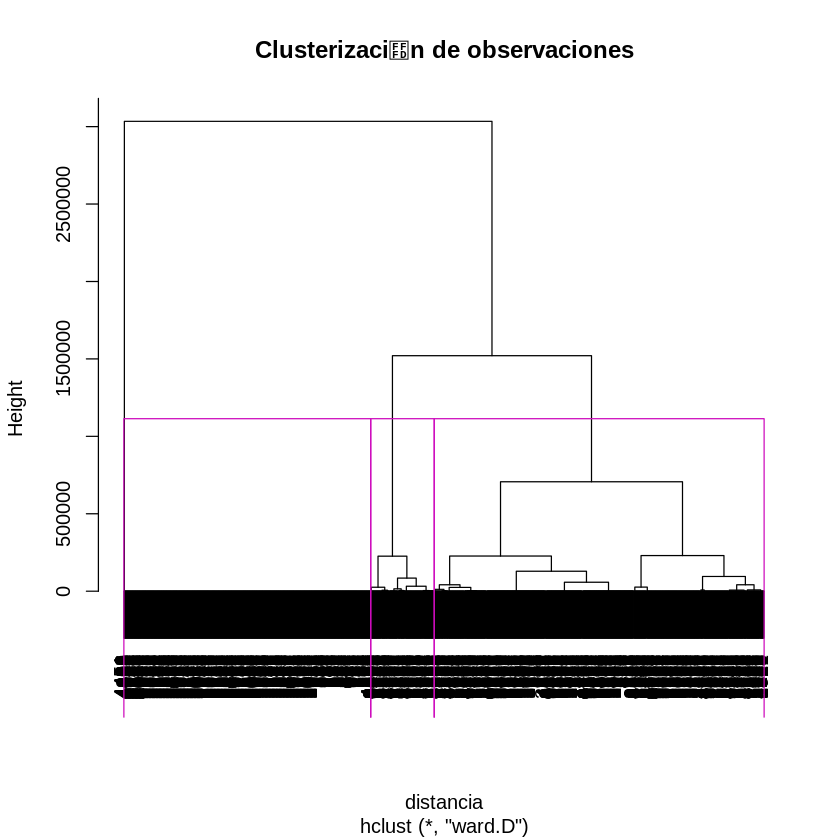

In [56]:
#Revisamos esto de nuevo con un dendograma con una partici�n k = 3:
#-------------------------------------------------------------------
#Generaci�n del Dendograma: (Ward. D es uno de los m�todos de clusterizaci�n)
fit <- hclust(distancia,"ward.D")                                               #Devuelve el conjunto de datos agrupados de cierta manera.
plot(fit, main="Clusterizaci�n de observaciones")
#Tenemos un �rbol donde lo cortamos y tenemos 3 grupos de diferenciaci�n. si cortamos m�s abajo
#el arbol encontramos grupos con alturas muy parecidas o si miramos el �ltimo nivel hay mucha dispersi�n entre los grupos.
rect.hclust(fit, k=3, border = 6)

#NOTA: ya con estos resultados nos snetimos m�s c�modos utilizando 3 grupos en vez de 4.



In [57]:
#Entonces para hacer los cortes: Etiquetas de clusters con corte k = 3.
k <- 3
cut_k <- cutree(fit,k)                                                          #cutree sirve para identificar si colocamos varios k
length(cut_k)
view(cut_k)
#cutree devuelve un vector del 1 al 3 donde se interpreta que la primera observaci�n pertenece al grupo 1, la segunda al grupo 1 y as�.



[1] 1735

In [58]:
#Ahora realizamos una interpretaci�n de los clusters:
data_clusters_final <- cbind(cleanOutliers,clusters=cut_k)                       #en esta parte se le agrega la columna que clasifica las observaciones en cada uno de los grupos
head(data_clusters_final)
view(data_clusters_final)

#Revisamos la estructura de los datos:
data_clusters_final$clusters <- as.factor(data_clusters_final$clusters)         #le damos estructura de factor a la columna cluster y devolvemos los valores de factores a las otras columnas.
data_clusters_final$Dictamen=as.factor(data_clusters_final$Dictamen)            #Convertimos en factores a: "Dictamen" , "Vivienda","Estado Civil", "Registros", "Tipo de Trabajo"
data_clusters_final$Vivienda=as.factor(data_clusters_final$Vivienda)
data_clusters_final$Estado.civil=as.factor(data_clusters_final$Estado.civil)
data_clusters_final$Registros=as.factor(data_clusters_final$Registros)
data_clusters_final$Tipo.trabajo=as.factor(data_clusters_final$Tipo.trabajo)

str(data_clusters_final)



Dictamen Antiguedad.Trabajo Vivienda Plazo Edad Estado.civil Registros
1  1        9                  1        60    30   2            1        
6  1        1                  2        60    36   2            1        
9  1        0                  2        60    32   2            1        
10 2        0                  5        48    41   2            1        
11 1        6                  2        48    34   2            1        
12 1        7                  2        36    29   2            1        
   Tipo.trabajo Gastos Ingresos Patrimonio Cargas.patrimoniales
1  3            73     129          0      0                   
6  1            75     214       3500      0                   
9  3            90     107      15000      0                   
10 2            90      80          0      0                   
11 3            60     125       4000      0                   
12 1            60     121       3000      0                   
   Importe.solicitado Precio.del.bien.financiado clusters
1   800                846                       1       
6   650               1645                       2       
9  1200               1957                       3       
10 1200               1468                       1       
11 1150               1577                       2       
12  650                915                       2

'data.frame':	1735 obs. of  15 variables:
 $ Dictamen                  : Factor w/ 2 levels "1","2": 1 1 1 2 1 1 1 2 1 1 ...
 $ Antiguedad.Trabajo        : int  9 1 0 0 6 7 0 0 27 26 ...
 $ Vivienda                  : Factor w/ 6 levels "1","2","3","4",..: 1 2 2 5 2 2 2 4 1 2 ...
 $ Plazo                     : int  60 60 60 48 48 36 24 48 60 60 ...
 $ Edad                      : int  30 36 32 41 34 29 68 36 41 51 ...
 $ Estado.civil              : Factor w/ 1 level "2": 1 1 1 1 1 1 1 1 1 1 ...
 $ Registros                 : Factor w/ 1 level "1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Tipo.trabajo              : Factor w/ 4 levels "1","2","3","4": 3 1 3 2 3 1 1 2 1 1 ...
 $ Gastos                    : int  73 75 90 90 60 60 75 45 74 45 ...
 $ Ingresos                  : int  129 214 107 80 125 121 131 130 140 143 ...
 $ Patrimonio                : int  0 3500 15000 0 4000 3000 4162 750 0 3500 ...
 $ Cargas.patrimoniales      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Importe.solicitado        : int  800 65

In [59]:
##############################################################################################################################
#                                                                 <<CENTROIDES:>>
##############################################################################################################################
data <- data_clusters_final
#promedio de las variables num�ricas
centroides <- data.frame(data%>%dplyr::group_by(clusters)%>%dplyr::summarise(Antiguedad.Trabajo=mean(Antiguedad.Trabajo),Plazo=mean(Plazo),Edad=mean(Edad),Gastos=mean(Gastos),Ingresos=mean(Ingresos),Patrimonio=mean(Patrimonio),Cargas.patrimoniales=mean(Cargas.patrimoniales,Importe.solicitado=mean(Importe.solicitado),Precio.del.bien.financiado=mean(Precio.del.bien.financiado))))
centroides


#Encontramos que el grupo 1 se diferencia bastante al resto de grupos, porque es mucho menor a los 4 grupos restantes.Sin embargo vemos que el grupo 2 se parece mucho al 3
#y que el grupo 4 se parece mucho al 5.Entonces una posible iteraci�n es analizar el corte del Tree en 3 porque esto me puede dar un indicador de que posiblemente
#que algunos grupos que ocnsider� que se fusionaron muy grande tiene caracter�sticas similares a otro grupo.

?melt

#Visualizaci�n de centroides (visualizaci�n por vairable)
install.packages("melt")
install.packages("FSelector")
install.packages("colorspace")
install.packages("reshape2")
install.packages("stats")
install.packages("cluster")
install.packages("mclust")
install.packages("dendextend")
install.packages("ClustOfVar")
install.packages("NBClust")
install.packages("FSelector")
install.packages("patchwork")

library(melt)
library(FSelector)
library(colorspace)


library(dplyr)
library(reshape2)
library(tidyr)
library(ggplot2)
library(stats)
library(cluster)
library(mclust)
library(factoextra)
library(dendextend)
library(ClustOfVar)
library(NbClust)
library(FSelector)
library(colorspace)
library(patchwork)
centroides_melt <- centroides %>% melt(id.vars="clusters", variable.name="variable", value.name="valor")
centroides_melt

pallete <- rainbow_hcl(length(unique(centroides_melt$variable)))
c <- 1

myplots <- vector('list', length(unique(centroides_melt$variable)))
myplots

for(v in unique(centroides_melt$variable)){
  message(v)
  d <- centroides_melt%>%filter(variable==v)%>%select(clusters,valor)

  myplots[[c]] <- local({
    c <- c
    g <- ggplot(d, aes(x=clusters,y=valor, group=1)) +
      geom_line(color=pallete[c]) +
      geom_point(color=pallete[c]) +
      ggtitle("Visualizaci�n de centroides", subtitle = paste("Variable",v))
    print(g)
  })
  c <- c+1
}
library(patchwork)
(myplots[[1]]+myplots[[2]]+myplots[[3]]+myplots[[4]]+myplots[[5]]+myplots[[6]]+myplots[[7]])


clusters Antiguedad.Trabajo Plazo    Edad     Gastos   Ingresos Patrimonio
1 1        6.780269           48.23318 35.21226 63.54709 119.8610     0.00  
2 2        9.101790           46.30872 40.73714 58.94743 120.3289  4170.13  
3 3        9.976744           43.74419 45.38372 60.41860 126.3779 11536.63  
  Cargas.patrimoniales
1 0                   
2 0                   
3 0

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sitmo’, ‘BH’, ‘dqrng’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RWekajars’, ‘rJava’, ‘entropy’, ‘RWeka’


Warning message in install.packages("FSelector"):
“installation of package ‘rJava’ had non-zero exit status”
Warning message in install.packages("FSelector"):
“installation of package ‘RWekajars’ had non-zero exit status”
Warning message in install.packages("FSelector"):
“installation of package ‘RWeka’ had non-zero exit status”
Warning message in install.packages("FSelector"):
“installation of package ‘FSelector’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning

ERROR: ignored

K-means clustering with 2 clusters of sizes 1399, 336

Cluster means:
  Dictamen Antiguedad.Trabajo Vivienda    Plazo     Edad Estado.civil Registros
1 1.236598           7.912795 2.385275 47.24518 37.83417            2         1
2 1.104167           9.877976 2.232143 44.92857 44.20238            2         1
  Tipo.trabajo   Gastos Ingresos Patrimonio Cargas.patrimoniales
1     1.558256 61.05575 118.8742   1864.865                    0
2     1.922619 60.08036 128.5506   9236.458                    0
  Importe.solicitado Precio.del.bien.financiado clusters
1           975.8256                   1366.028 1.521801
2          1000.4077                   1418.098 2.511905

Clustering vector:
   1    6    9   10   11   12   16   19   24   25   26   29   33   34   37   38 
   1    1    2    1    1    1    1    1    1    1    1    1    1    1    2    1 
  39   42   45   48   50   52   55   59   61   62   64   65   66   67   68   69 
   1    1    1    1    2    1    1    1    1    1    1    1  

             Length Class  Mode   
cluster      1735   -none- numeric
centers        30   -none- numeric
totss           1   -none- numeric
withinss        2   -none- numeric
tot.withinss    1   -none- numeric
betweenss       1   -none- numeric
size            2   -none- numeric
iter            1   -none- numeric
ifault          1   -none- numeric

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
NULL

[[12]]
NULL

[[13]]
NULL

[[14]]
NULL

[[15]]
NULL

[1] Cluster 1 Cluster 1 Cluster 2 Cluster 1 Cluster 1 Cluster 1 Cluster 1
   [8] Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1
  [15] Cluster 2 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 2
  [22] Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1
  [29] Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 2 Cluster 1 Cluster 2
  [36] Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 2 Cluster 2
  [43] Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1
  [50] Cluster 1 Cluster 1 Cluster 2 Cluster 1 Cluster 1 Cluster 2 Cluster 1
  [57] Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1
  [64] Cluster 2 Cluster 2 Cluster 2 Cluster 1 Cluster 1 Cluster 1 Cluster 2
  [71] Cluster 1 Cluster 1 Cluster 2 Cluster 1 Cluster 1 Cluster 1 Cluster 2
  [78] Cluster 1 Cluster 2 Cluster 2 Cluster 1 Cluster 1 Cluster 2 Cluster 1
  [85] Cluster 1 Cluster 1 Cluster 1 Cluster 2 Cluster 2 Cluster 2 Cluster 1
  [92] Cluster 1 Cluster 2 Cluster 1 Cluster 1 Cluster 2 Cluster 1 Cluster 1
  [99] Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1
 [106] Cluster 1 Cluster 1 Cluster 2 Cluster 2 Cluster 1 Cluster 1 Cluster 1
 [113] Cluster 1 Cluster 2 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1
 [120] Cluster 1 Cluster 2 Cluster 1 Cluster 2 Cluster 1 Cluster 2 Cluster 1
 [127] Cluster 1 Cluster 1 Cluster 1 Cluster 2 Cluster 1 Cluster 2 Cluster 1
 [134] Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1
 [141] Cluster 1 Cluster 1 Cluster 2 Cluster 2 Cluster 2 Cluster 1 Cluster 2
 [148] Cluster 1 Cluster 2 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1
 [155] Cluster 1 Cluster 1 Cluster 2 Cluster 1 Cluster 1 Cluster 1 Cluster 1
 [162] Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1
 [169] Cluster 2 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1
 [176] Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 2 Cluster 1
 [183] Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1
 [190] Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1
 [197] Cluster 1 Cluster 1 Cluster 2 Cluster 1 Cluster 1 Cluster 1 Cluster 1
 [204] Cluster 2 Cluster 1 Cluster 2 Cluster 1 Cluster 1 Cluster 1 Cluster 1
 [211] Cluster 2 Cluster 1 Cluster 1 Cluster 2 Cluster 1 Cluster 1 Cluster 1
 [218] Cluster 1 Cluster 1 Cluster 2 Cluster 1 Cluster 1 Cluster 1 Cluster 1
 [225] Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1
 [232] Cluster 2 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1
 [239] Cluster 2 Cluster 1 Cluster 1 Cluster 1 Cluster 2 Cluster 1 Cluster 2
 [246] Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 2
 [253] Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1
 [260] Cluster 1 Cluster 2 Cluster 1 Cluster 2 Cluster 1 Cluster 2 Cluster 1
 [267] Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 2
 [274] Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1
 [281] Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1
 [288] Cluster 1 Cluster 1 Cluster 2 Cluster 1 Cluster 1 Cluster 1 Cluster 1
 [295] Cluster 2 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1
 [302] Cluster 1 Cluster 2 Cluster 1 Cluster 1 Cluster 2 Cluster 1 Cluster 1
 [309] Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1
 [316] Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1
 [323] Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1
 [330] Cluster 2 Cluster 2 Cluster 1 Cluster 1 Cluster 1 Cluster 2 Cluster 2
 [337] Cluster 2 Cluster 1 Cluster 2 Cluster 1 Cluster 1 Cluster 1 Cluster 1
 [344] Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 2 Cluster 1 Cluster 2
 [351] Cluster 1 Cluster 1 Cluster 2 Cluster 1 Cluster 1 Cluster 2 Cluster 1
 [358] Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1 Cluster 1

Dictamen

Antiguedad.Trabajo

Vivienda



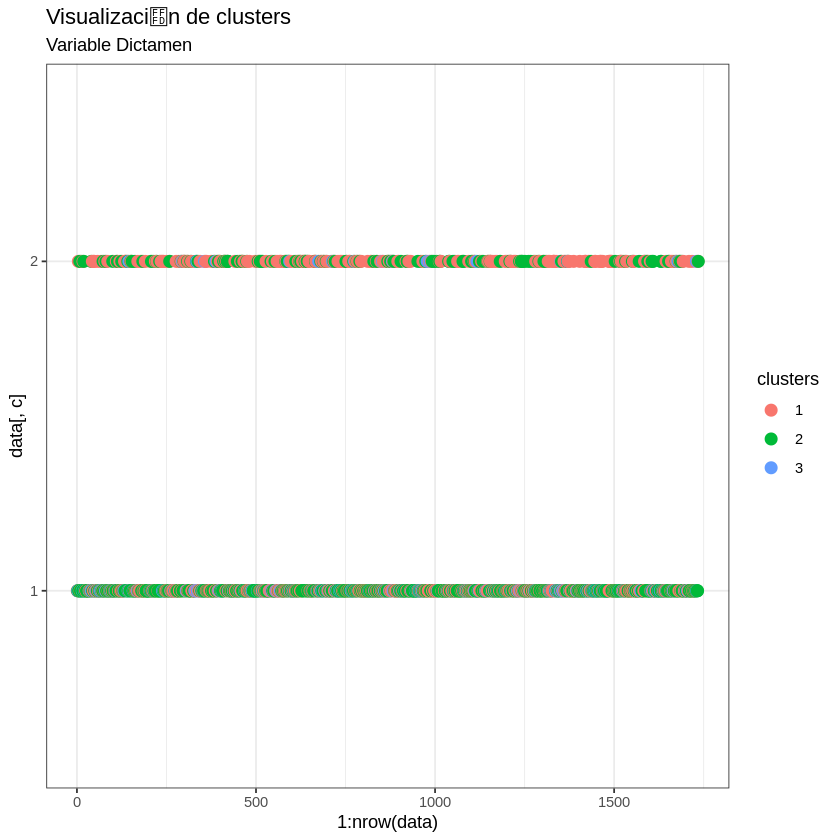

Plazo



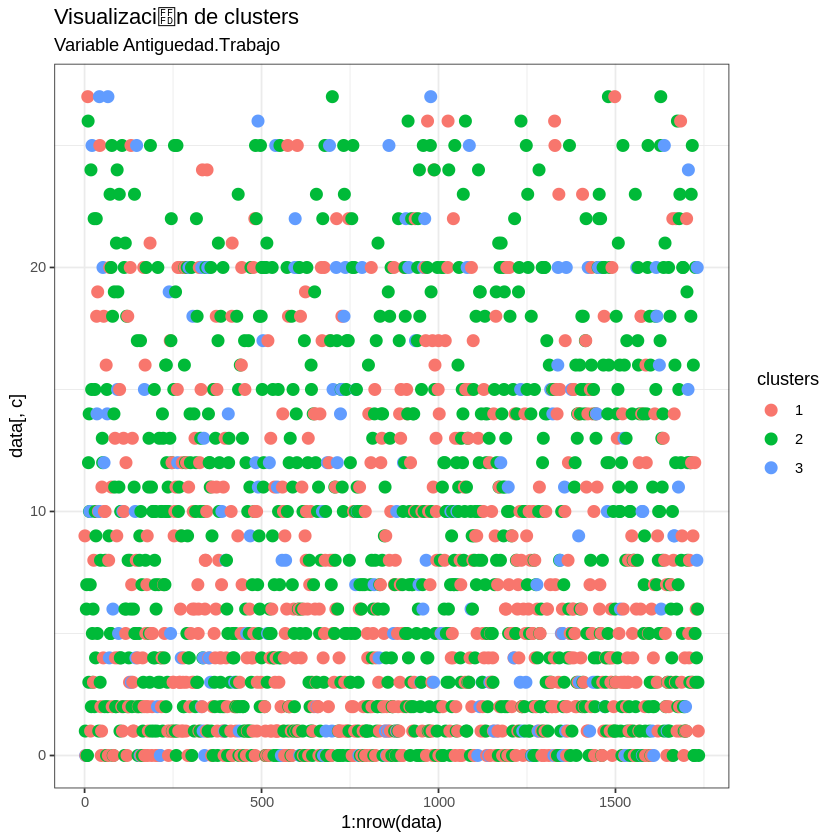

Edad



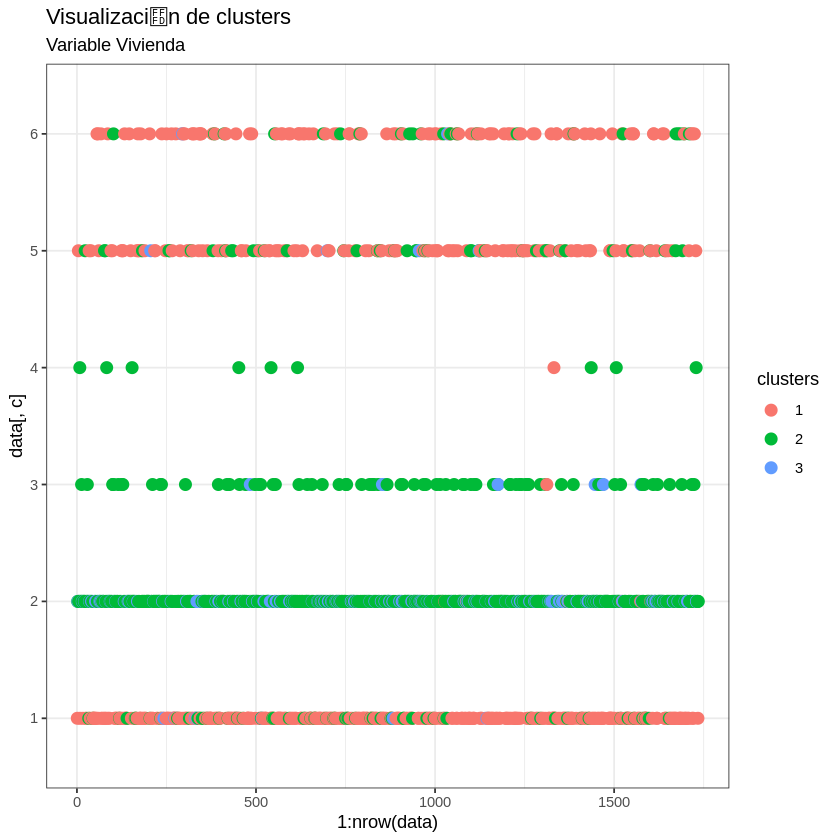

Estado.civil



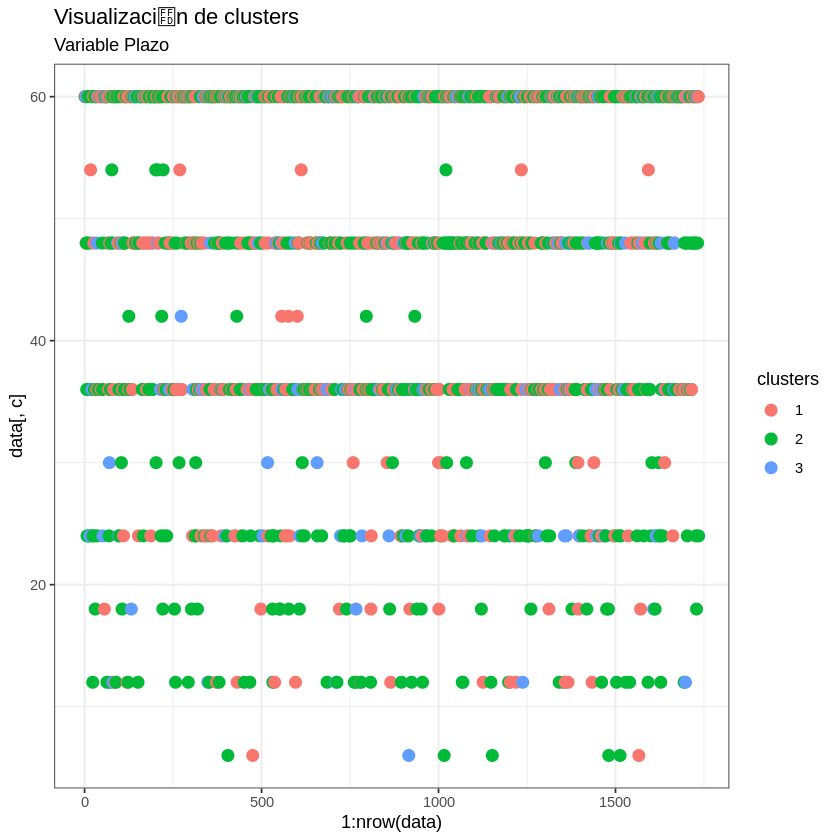

Registros



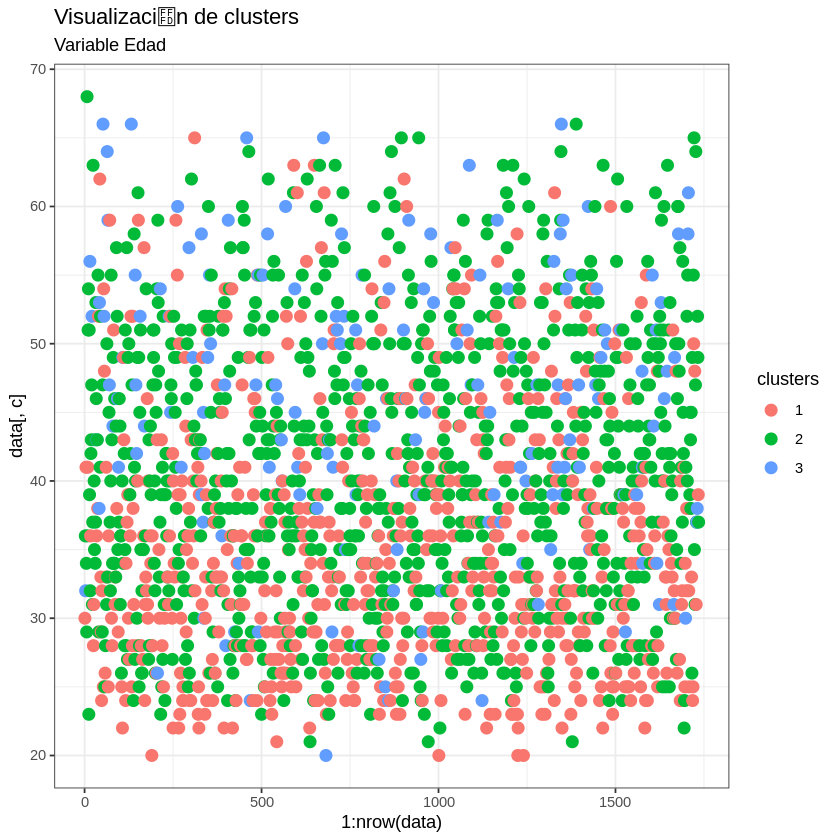

Tipo.trabajo



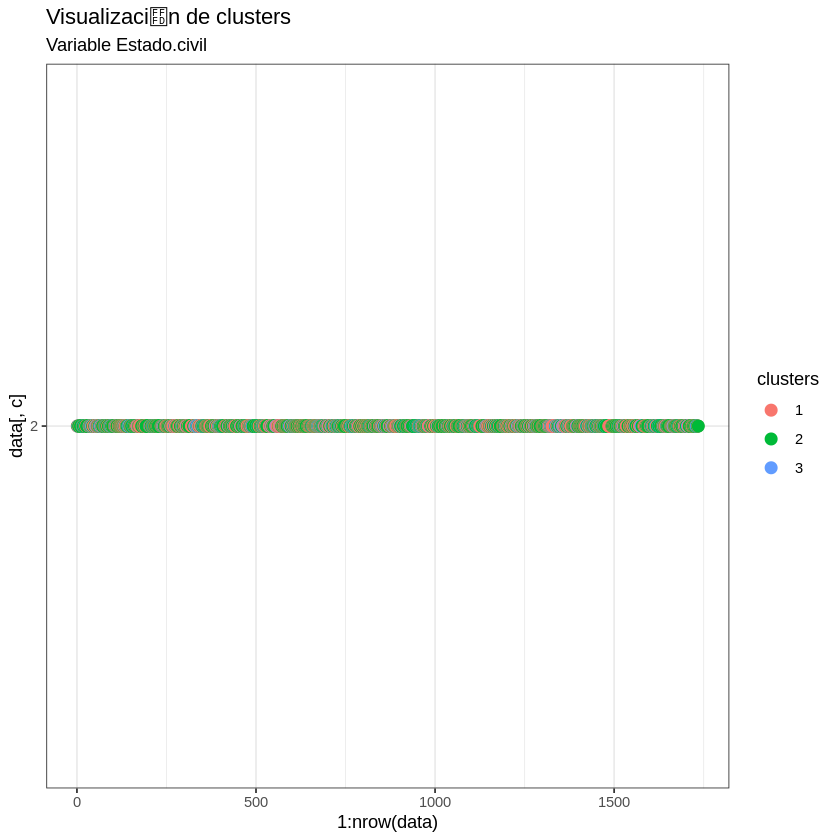

Gastos



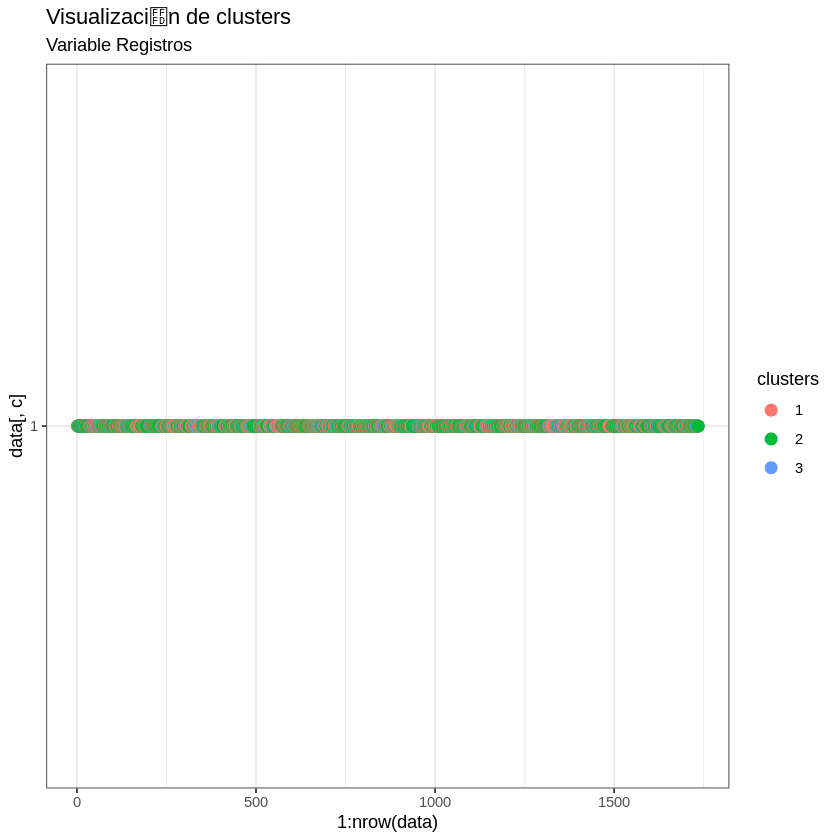

Ingresos



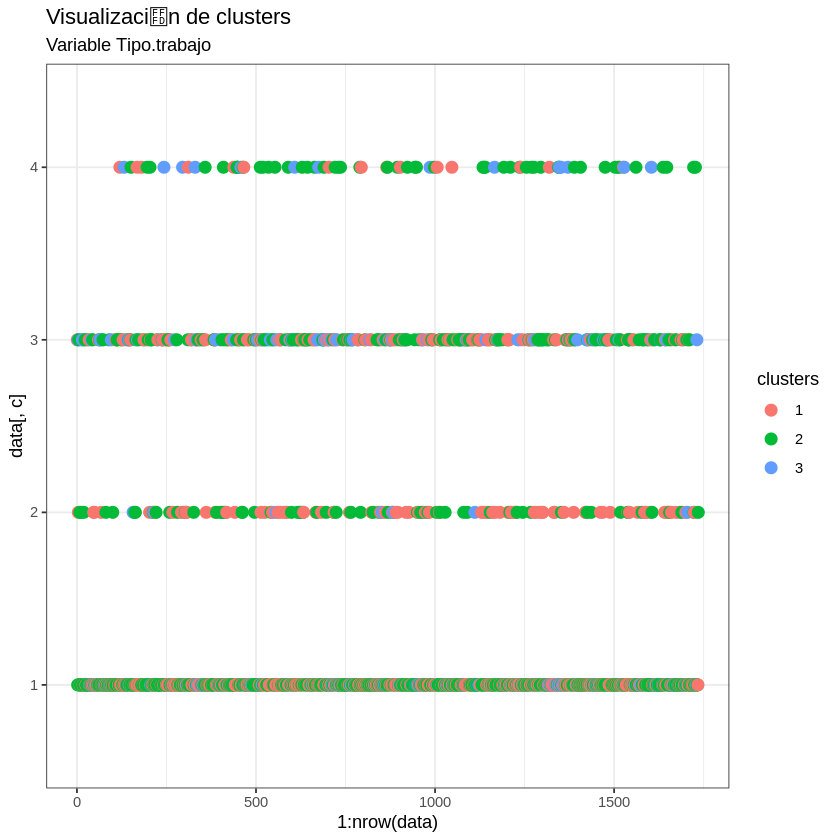

Patrimonio



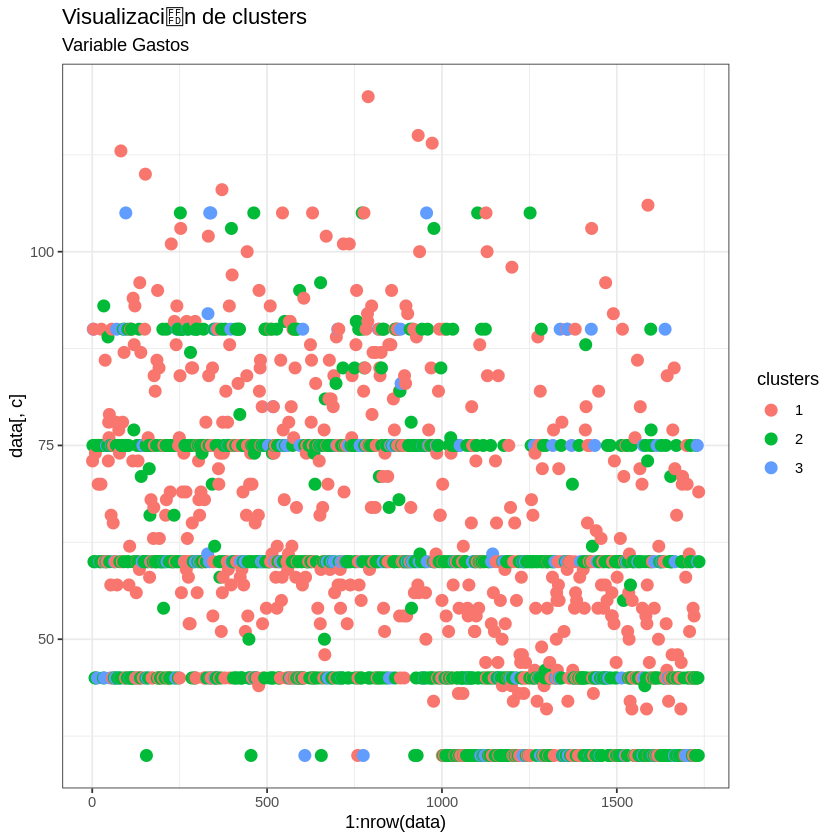

Cargas.patrimoniales



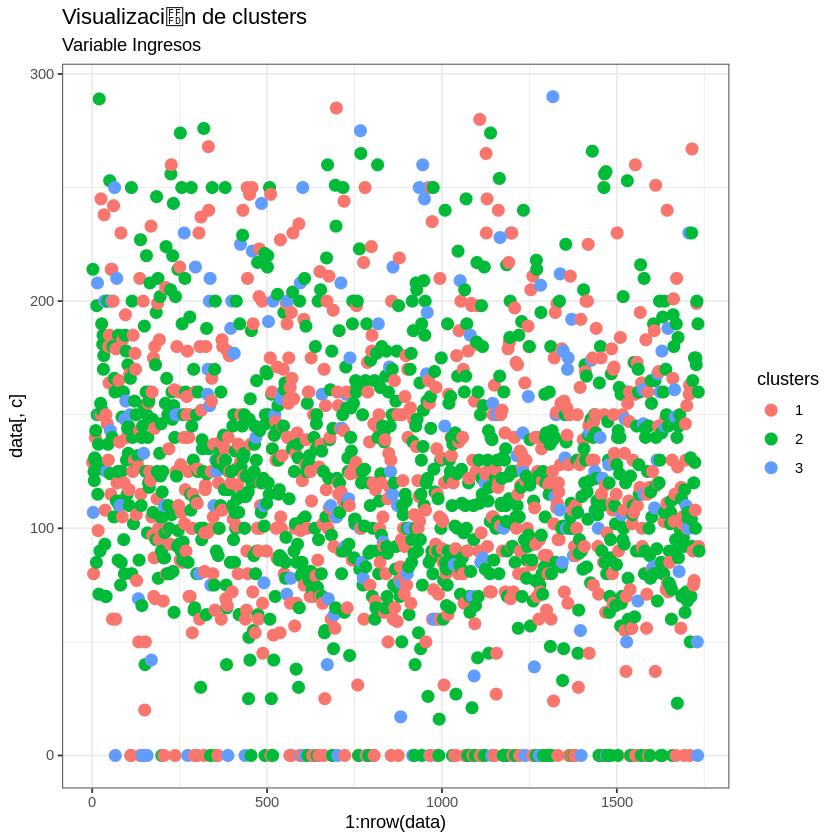

Importe.solicitado



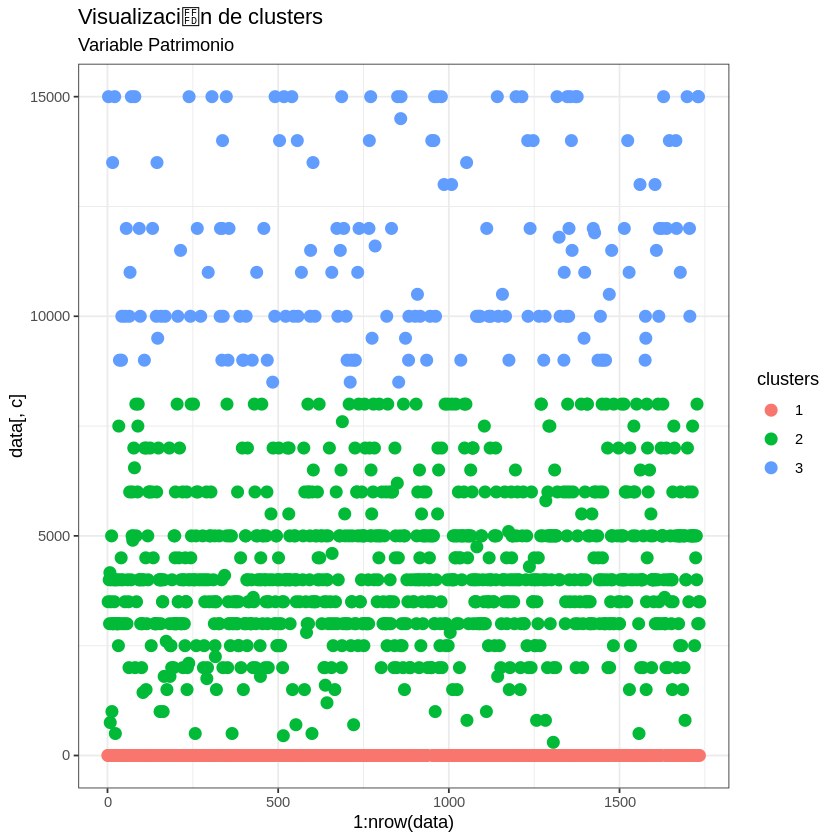

Precio.del.bien.financiado



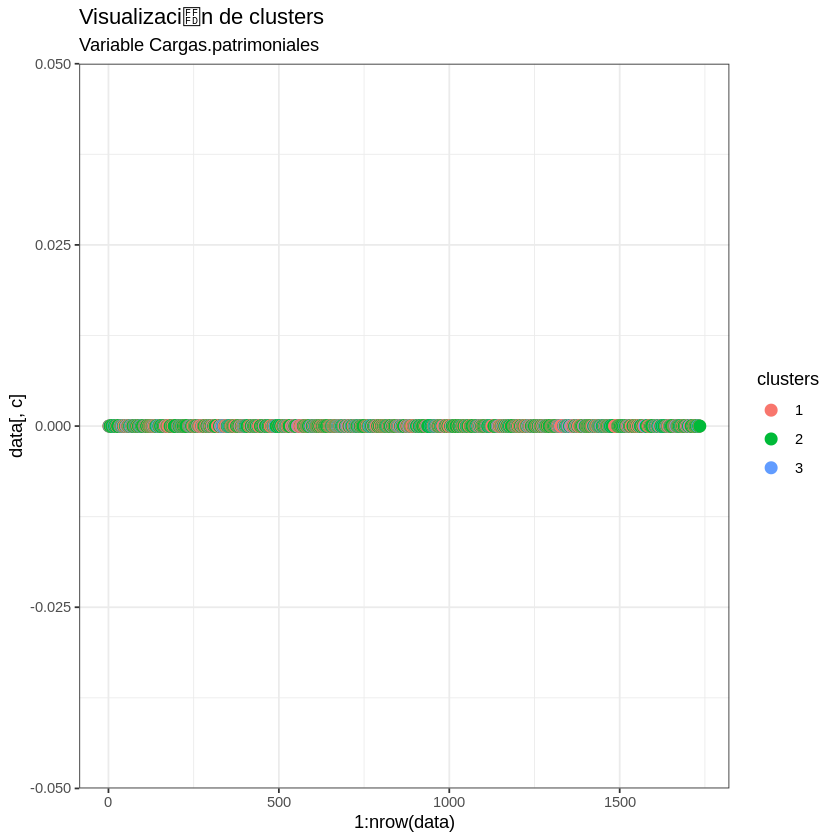

clusters



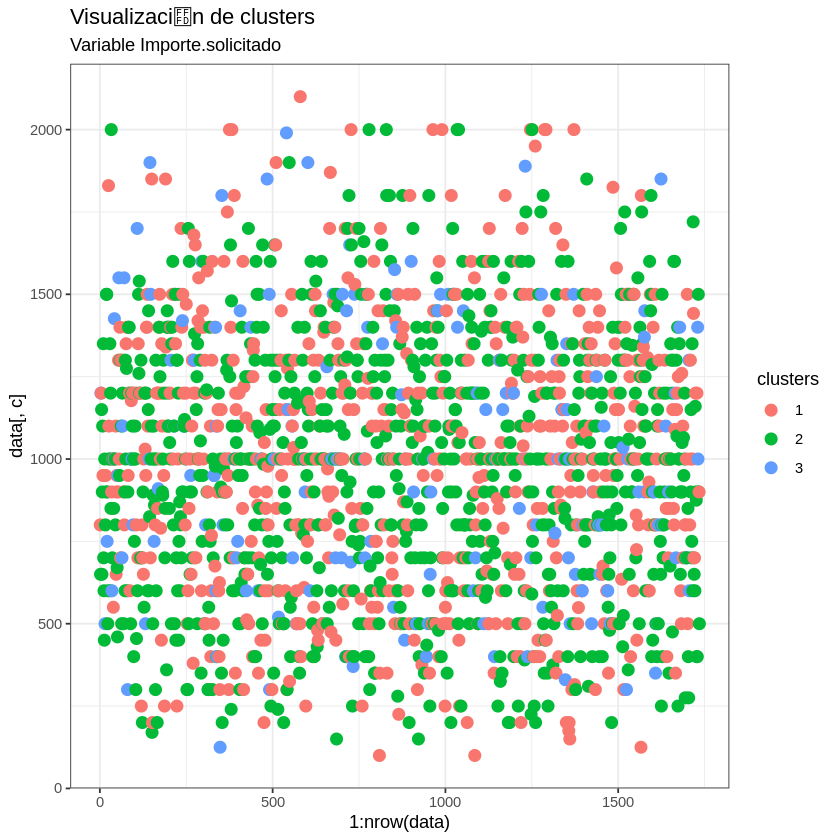

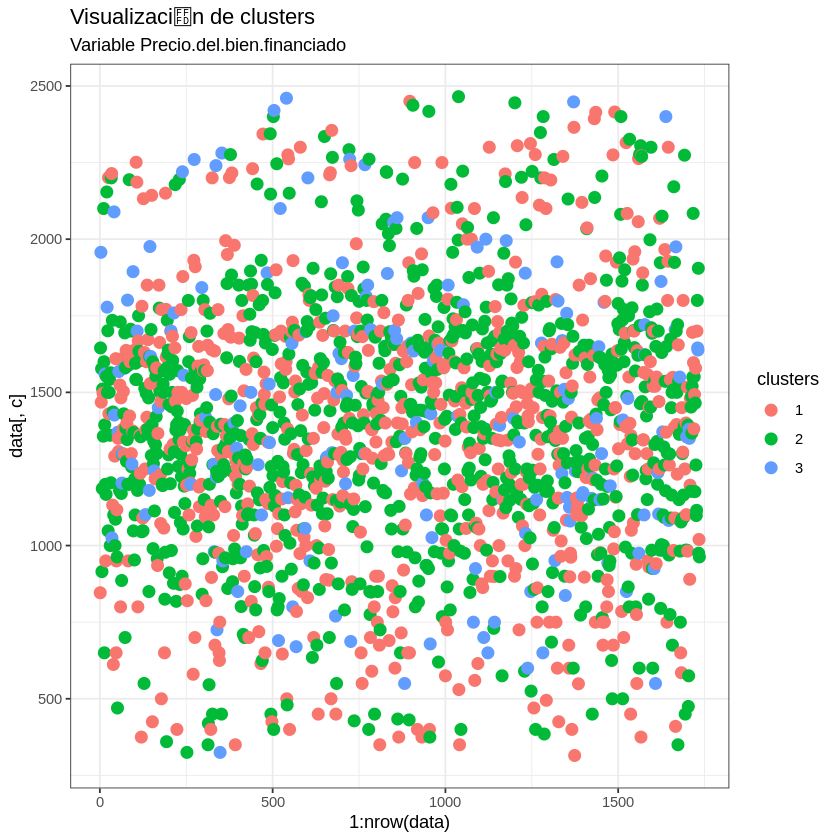

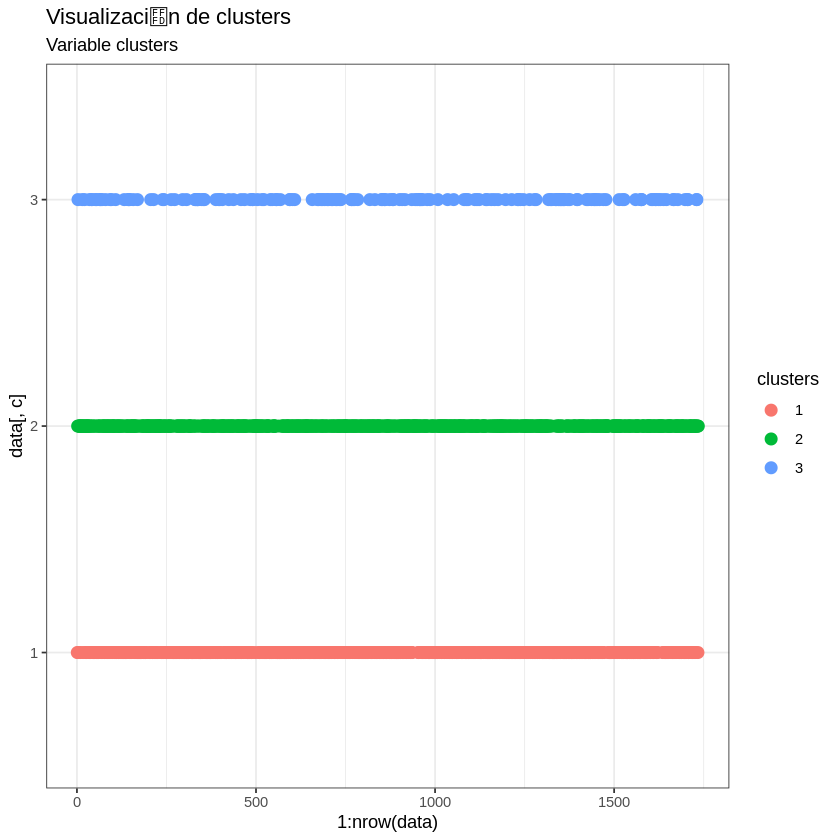

In [69]:

#-------------------------------------------------------------------------------
#con la instrucci�n anterior tenemos varias graficas que nos muestra:
#-------------------------------------------------------------------------------

#a.- Antiguedad Trabajo  *: Son m�s valorados los clientes que tiene m�s de 10 a�os de experiencia en la parte laboral para un cr�dito.
#b.- Plazo               *: Por encima de 47 meses es plazo mayormente tomado por los clietnes.
#c.- Edad                *: Los clientes que mayormente toma pr�stamo en promedio tiene 40 a�os.
#d.- Gastos / Ingresos   *: Se tiene encuenta clientes que en promedio tenga gastos alrededor de $57 kpts
#                            con ingresos promedios alrededor de $150 kpts.
#e.- Patrimonio          *: En promedio, los clientes con un patrimonio de $8.750 kpts
#f.- Cargas patrimoniales*: en promedio, los clientes con mayor perfil son los que a parte de a-e
#                            tienen cargas patrimoniales alrededor de 1000 kpts.

##############################################################################################################################
#                                                                    <<CLUSTERS>>
##############################################################################################################################

#----------------------------------------------------------------------- KMEANS ----------------------------------------------

km_clusters <- kmeans(x = data_clusters_final, centers = 2, nstart = 50)
km_clusters

summary(km_clusters)

#VISUALIZACI�N DE Clusters

c <- 1

myplots <- vector('list', ncol(data_clusters_final))
myplots

clusters <- as.factor(paste("Cluster",km_clusters$cluster))
clusters

for(v in names(data_clusters_final)){
  message(v)
  myplots[[c]] <- local({
    c <- c

    g <- ggplot(data = data_clusters_final, aes(x = 1:nrow(data), y = data[,c], color = clusters)) +
      geom_point(size = 3) +
      theme_bw() +
      ggtitle("Visualizaci�n de clusters", subtitle = paste("Variable",v))
    print(g)
  })
  c <- c+1
}
